# Data Exploration & Cleaning
Data was taken from IPUMS CPS. The focus of this exploration lies on ethnicity/race.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_path = r'../../data/cps_ethnicity_asec.csv'
example_data_path = r'../../data/full_edgelist_clean_labforce_quality.csv'
occ_data_path =r'../../data/occ.csv'
occ2010_data_path = r'../../data/occ2010_codes.txt'
occ1950_data_path = r'../../data/occ1950_codes.txt'
race_occ_path = r'../../data/race_codes.txt'

In [3]:
data_df = pd.read_csv(data_path)

In [4]:
data_df.head()

YEAR  SERIAL  MONTH           CPSID  ASECFLAG  HFLAG  ASECWTH  REGION  \
0  1991       2      3  19910202888900         1    NaN   782.31      11   
1  1991       2      3  19910202888900         1    NaN   782.31      11   
2  1991       3      3  19910200505500         1    NaN   847.96      11   
3  1991       3      3  19910200505500         1    NaN   847.96      11   
4  1991       3      3  19910200505500         1    NaN   847.96      11   

   STATEFIP  STATECENSUS  ...  ASECOVERP  OCCLY  OCC90LY  OCC10LY  QOCCLY  \
0        23           11  ...          0     19       22      430       0   
1        23           11  ...          0     19       22      430       0   
2        23           11  ...          0    178      178     2100       0   
3        23           11  ...          0    178      178     2100       0   
4        23           11  ...          0      0      999     9999       0   

   MIGSTA1  WHYMOVE  MIGRATE1  UH_SUPREC_A1  UH_SUPREC_A2  
0       99      NaN         1           1.0           NaN  
1       99      NaN         1           1.0           NaN  
2       99      NaN         1           1.0           NaN  
3       99      NaN         1           1.0           NaN  
4        0      NaN         0           0.0           NaN  

[5 rows x 44 columns]

In [5]:
data_df.isna().sum()

YEAR                  0
SERIAL                0
MONTH                 0
CPSID                 0
ASECFLAG              0
HFLAG           5705157
ASECWTH               0
REGION                0
STATEFIP              0
STATECENSUS           0
ASECOVERH             0
PERNUM                0
CPSIDV                0
CPSIDP                0
ASECWT                0
AGE                   0
SEX                   0
RACE                  0
ASIAN           3951546
SPLOC                 0
SPRULE                0
BPL              469470
YRIMMIG          469470
CITIZEN          469470
MBPL             469470
FBPL             469470
NATIVITY         469470
HISPAN                0
EMPSTAT               0
LABFORCE              0
OCC                   0
OCC2010               0
OCC1950               0
QOCC                  0
ASECOVERP             0
OCCLY                 0
OCC90LY               0
OCC10LY               0
QOCCLY                0
MIGSTA1               0
WHYMOVE         1164002
MIGRATE1        

### What is the difference between OCC, OCC2010, OCC1950?
According to the description:
* OCC1950: Occupation, 1950 basis
* OCC2010: Occupation, 2010 basis

But why are there different codes for occ? There is nothing documented <br>
When checking if the occ2010 and occ1950 codes are consistent we observe this is true for all but 1 case. e.g. for all entries where OCC = 10 -> OCC2010 = 10 and OCC1950 = 290

Which occupation code col should be used? A combination of different ones?

In [6]:
occ_unique_values = data_df['OCC'].unique()

In [7]:
data_df[data_df['OCC']==19]['OCC2010']

0          430
1          430
5          430
43         430
60         430
          ... 
1828323    320
1837067    320
1837713    320
1848053    320
1850411    320
Name: OCC2010, Length: 5352, dtype: int64

In [8]:
occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
occ2010_df.columns = ['Code', 'occ_title']

occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)
occ1950_df.columns = ['Code', 'occ_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\1473689498.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ2010_df = pd.read_csv(occ2010_data_path, sep='                ', header=None)
C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\1473689498.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  occ1950_df = pd.read_csv(occ1950_data_path, sep='                ', header=None)


In [9]:
for val in occ_unique_values:
    arr_1950 = data_df[data_df['OCC']==val]['OCC1950'].to_numpy()
    arr_2010 = data_df[data_df['OCC']==val]['OCC2010'].to_numpy()

    print('Occ ', val)
    print('1950: ', (arr_1950[0] == arr_1950).all(), '|', occ1950_df[occ1950_df['Code']==arr_1950[0]]['occ_title'].item())
    print('2010:', (arr_2010[0] == arr_2010).all(), '|', occ2010_df[occ2010_df['Code']==arr_2010[0]]['occ_title'].item())
    print('--------------------------------------')

Occ  19
1950:  False |  Managers, officials, and proprietors (n.e.c.)
2010: False | Managers, nec (including Postmasters)
--------------------------------------
Occ  178
1950:  True |  Lawyers and judges
2010: True | Lawyers, and judges, magistrates, and other judicial workers
--------------------------------------
Occ  0
1950:  True |  NIU
2010: True | NIU
--------------------------------------
Occ  203
1950:  True |  Technicians, medical and dental
2010: True | Clinical Laboratory Technologists and Technicians
--------------------------------------
Occ  37
1950:  True |  Officials and administrators (n.e.c.), public administration
2010: True | Other Business Operations and Management Specialists
--------------------------------------
Occ  144
1950:  True |  Nonscientific subjects
2010: True | Postsecondary Teachers
--------------------------------------
Occ  744
1950:  True |  Operative and kindred workers (n.e.c.)
2010: True | Sewing Machine Operators
-------------------------------

In [10]:
occ_df = pd.read_csv(occ_data_path, sep='\t')

In [11]:
occ_df.loc[occ_df["Code"] == 6540]

Code                     occupation
385  6540  Solar Photovoltaic Installers

In [12]:
occ_df.head()

Code                           occupation
0     0                      Not in universe
1    10                     Chief executives
2    20      General and operations managers
3    30                          Legislators
4    40  Advertising and promotions managers

This dataframe only contains entries with ASECFLAG = 1

In [13]:
data_df['ASECFLAG'].unique()

array([1], dtype=int64)

Some entries seem to represent kids which have no occupation. We are only interested in adults.

In [14]:
data_df['AGE'].unique()

array([56, 37, 28,  0, 50, 44, 18, 17, 43, 64, 29,  4, 23, 24, 30, 15, 12,
        7, 38, 46, 26, 58, 89, 85, 55, 61, 45, 20, 19, 16, 14, 13,  9,  6,
        3, 47,  2, 36, 10, 77, 22, 31, 52, 49, 65, 63, 11, 35, 33,  5, 42,
       39, 27,  1, 34, 67, 66, 21, 75, 71, 68, 76, 40, 57, 54, 83, 60, 72,
       86, 41, 32, 87, 62, 84, 69, 53, 51, 73, 78, 48, 25,  8, 74, 70, 59,
       79, 90, 88, 82, 80, 81], dtype=int64)

In [15]:
data_df[data_df['AGE']==8]

YEAR  SERIAL  MONTH           CPSID  ASECFLAG  HFLAG  ASECWTH  \
294      1991     141      3  19910205148100         1    NaN   835.57   
428      1991     223      3  19910104959000         1    NaN   806.84   
478      1991     245      3  19900102860600         1    NaN   861.83   
507      1991     266      3  19900104001400         1    NaN   914.11   
535      1991     282      3  19900100158400         1    NaN   914.11   
...       ...     ...    ...             ...       ...    ...      ...   
5904401  2023   88856      3               0         1    NaN   379.37   
5904626  2023   88954      3               0         1    NaN   367.55   
5904627  2023   88954      3               0         1    NaN   367.55   
5904674  2023   88967      3               0         1    NaN   647.96   
5904704  2023   88976      3               0         1    NaN   445.78   

         REGION  STATEFIP  STATECENSUS  ...  ASECOVERP  OCCLY  OCC90LY  \
294          11        23           11  ...          0      0      999   
428          11        23           11  ...          0      0      999   
478          11        23           11  ...          0      0      999   
507          11        23           11  ...          0      0      999   
535          11        23           11  ...          0      0      999   
...         ...       ...          ...  ...        ...    ...      ...   
5904401      42        15           95  ...          1      0      999   
5904626      42        15           95  ...          1      0      999   
5904627      42        15           95  ...          1      0      999   
5904674      42        15           95  ...          1      0      999   
5904704      42        15           95  ...          1      0      999   

         OCC10LY  QOCCLY  MIGSTA1  WHYMOVE  MIGRATE1  UH_SUPREC_A1  \
294         9999       0       99      NaN         1           0.0   
428         9999       0       99      NaN         1           0.0   
478         9999       0       99      NaN         1           0.0   
507         9999       0       99      NaN         1           0.0   
535         9999       0       99      NaN         1           0.0   
...          ...     ...      ...      ...       ...           ...   
5904401     9999       0       99      0.0         1           NaN   
5904626     9999       0       99      0.0         1           NaN   
5904627     9999       0       99      0.0         1           NaN   
5904674     9999       0       99      0.0         1           NaN   
5904704     9999       0       99      0.0         1           NaN   

         UH_SUPREC_A2  
294               NaN  
428               NaN  
478               NaN  
507               NaN  
535               NaN  
...               ...  
5904401           1.0  
5904626           1.0  
5904627           1.0  
5904674           1.0  
5904704           1.0  

[95135 rows x 44 columns]

In [16]:
data_df = data_df[data_df["AGE"] >=18]

Why not 01?<br>
01  Armed Forces, In Labor Force, Employed<br>
10  At work<br>
12  Has job, not at work last week

In [17]:
employed_codes = [10, 12]
unemployed_occ_codes = [0, 9840]
data_df = data_df[data_df["EMPSTAT"].isin(employed_codes)]
data_df = data_df[~data_df["OCCLY"].isin(unemployed_occ_codes)]

### Interesting Research Questions / Hypothesis
- If people that are born in a multicultural family (mother and father are born in different countries) are more likely to work in more diverse jobs (NATIVITY, Mother's Birthplace, Father's Birthplace)
- There are jobs that are dominated by a race
- People that have a spouse with a different nationality are more likely to work in more diverse jobs
- Jobs got more diverse in the past 20 years (not that much grouping)

In [18]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df['YEAR'] == 2023]
data_df = data_df[data_df['AGE'] >= 18]

In [19]:
race_codes_df = pd.read_csv(race_occ_path, sep='                ', header=None)
race_codes_df.columns = ['Code', 'race_title']

C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\1742790990.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  race_codes_df = pd.read_csv(race_occ_path, sep='                ', header=None)


In [20]:
race_occ_df = pd.DataFrame()
race_occ_df['Code'] = data_df['RACE']
race_occ_df['occ'] = data_df['OCC2010']

In [21]:
race_occ_df = pd.merge(race_occ_df, race_codes_df, on='Code')

In [22]:
race_occ_df['occ'].unique().size

424

In [23]:
race_occ_df

Code   occ                        race_title
0        100  9999                             White
1        100  9999                             White
2        100  9999                             White
3        100  4760                             White
4        100  9999                             White
...      ...   ...                               ...
110003   830  9999   Four or five races, unspecified
110004   830  4040   Four or five races, unspecified
110005   820  4230   Two or three races, unspecified
110006   820  9000   Two or three races, unspecified
110007   818  2720       Black-American Indian-Asian

[110008 rows x 3 columns]

Since people work in 424 different occupations in 2023, for a first analysis they are combined into more broad occupation groups according to the documentation.

In [24]:
occ_categories_dict = {'MANAGEMENT, BUSINESS, SCIENCE, AND ARTS': [10, 20, 30, 100, 110, 120, 130, 140, 150, 
                                            160, 205, 220, 230, 300, 310, 320, 330, 350, 
                                            360, 410, 420, 430],
'BUSINESS OPERATIONS SPECIALISTS':         [500, 510, 520, 530, 540, 560, 600, 620, 700, 710, 720, 730],
'FINANCIAL SPECIALISTS':                   [800, 810, 820, 830, 840, 850, 860, 900, 910, 930, 940, 950],
'COMPUTER AND MATHEMATICAL':               [1000, 1010, 1020, 1050, 1060, 1100, 1200, 1220, 1230, 1240],
'ARCHITECTURE AND ENGINEERING':            [1300, 1310, 1320, 1350, 1360, 1400, 1410, 1420, 1430, 1440, 
                                            1450, 1460, 1520, 1530, 1540],
'TECHNICIANS':                             [1550, 1560],
'LIFE, PHYSICAL, AND SOCIAL SCIENCE':      [1600, 1610, 1640, 1650, 1700, 1710, 1720, 1740, 1760, 1800, 1820, 
                                            1830, 1840, 1900, 1910, 1920, 1930, 1960, 1980],
'COMMUNITY AND SOCIAL SERVICES':           [2000, 2010, 2020, 2040, 2050, 2060],
'LEGAL':                                   [2100, 2140, 2150],
'EDUCATION, TRAINING, AND LIBRARY':        [2200, 2300, 2310, 2320, 2330, 2340, 2400, 2430, 2440, 2540, 2550],
'ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA': [2600, 2630, 2700, 2720, 2740, 2750, 2760, 2800, 2810, 2825, 
                                                   2840, 2850, 2860, 2900, 2910, 2920],
'HEALTHCARE PRACTITIONERS AND TECHNICAL':  [3000, 3010, 3030, 3040, 3050, 3060, 3110, 3120, 3130, 3140, 
                                            3150, 3160, 3200, 3210, 3220, 3230, 3240, 3250, 3260, 3300, 
                                            3310, 3320, 3400, 3410, 3500, 3510, 3520, 3530, 3540],
'HEALTHCARE SUPPORT':                      [3600, 3610, 3620, 3630, 3640, 3650],
'PROTECTIVE SERVICE':                      [3700, 3710, 3720, 3730, 3740, 3750, 3800, 3820, 3900, 3910, 3930, 3940, 3950],
'FOOD PREPARATION AND SERVING':            [4000, 4010, 4030, 4040, 4050, 4060, 4110, 4120, 4130, 4140, 4150],
'BUILDING AND GROUNDS CLEANING AND MAINTENANCE': [4200, 4210, 4220, 4230, 4240, 4250],
'PERSONAL CARE AND SERVICE':               [4300, 4320, 4340, 4350, 4400, 4420, 4430, 4460, 4500, 4510, 4520, 
                                            4530, 4540, 4600, 4610, 4620, 4640, 4650],
'SALES AND RELATED': [4700, 4720, 4740, 4750, 4760, 4800, 4810, 4820, 4830, 4840, 4850, 4900, 
                      4920, 4930, 4940, 4950, 4965],
'OFFICE AND ADMINISTRATIVE SUPPORT': [5000, 5010, 5020, 5030, 5100, 5110, 5120, 5130, 5140, 5150, 5160, 5165, 
                   5200, 5220, 5230, 5240, 5250, 5260, 5300, 5310, 5320, 5330, 5340, 5350, 
                   5360, 5400, 5410, 5420, 5500, 5510, 5520, 5530, 5540, 5550, 5560, 5600, 
                   5610, 5620, 5630, 5700, 5800, 5810, 5820, 5840, 5850, 5860, 5900, 5910, 
                   5920, 5940],
'FARMING, FISHING, AND FORESTRY': [6005, 6010, 6040, 6050, 6100, 6120, 6130],
'CONSTRUCTION': [6200, 6210, 6220, 6230, 6240, 6250, 6260, 6300, 6320, 6330, 6355, 6360, 
                      6400, 6420, 6430, 6440, 6460, 6500, 6515, 6520, 6530, 6600, 6660, 6700, 
                      6710, 6720, 6730, 6740, 6765],
'EXTRACTION': [6800, 6820, 6830, 6840, 6940],
'INSTALLATION, MAINTENANCE, AND REPAIR': [7000, 7010, 7020, 7030, 7040, 7100, 7110, 7120, 7125, 7130, 7140, 7150, 
                      7160, 7200, 7210, 7220, 7240, 7260, 7300, 7315, 7320, 7330, 7340, 7350, 
                      7360, 7410, 7420, 7430, 7510, 7540, 7550, 7560, 7610, 7630],
'PRODUCTION': [7700, 7710, 7720, 7730, 7740, 7750, 7800, 7810, 7830, 7840, 7850, 
                    7855, 7900, 7920, 7930, 7940, 7950, 7960, 8000, 8010, 8030, 8040, 
                    8060, 8100, 8130, 8140, 8150, 8200, 8210, 8220, 8230, 8250, 8300, 
                    8310, 8320, 8330, 8340, 8350, 8400, 8410, 8420, 8450, 8460, 8500, 
                    8510, 8530, 8540, 8550, 8600, 8610, 8620, 8630, 8640, 8650, 8710, 
                    8720, 8730, 8740, 8750, 8760, 8800, 8810, 8830, 8850, 8860, 8910, 
                    8920, 8930, 8940, 8950, 8965],
'TRANSPORTATION AND MATERIAL MOVING': [9030, 9040, 9050, 9100, 9130, 9140, 9150, 9200, 9230, 9240, 
                        9260, 9300, 9310, 9350,  9360, 9410, 9420, 9510, 9000, 9520, 
                        9560, 9600, 9610, 9620, 9630, 9640, 9650, 9720, 9750],
'MILITARY SPECIFIC': [9800, 9810, 9820, 9830],
'NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)': [9999]
}

In [25]:
category_df = pd.DataFrame([(code, category) for category, codes in occ_categories_dict.items() for code in codes],
                           columns=['occ', 'Category'])

In [26]:
race_occ_df = pd.merge(race_occ_df, category_df, on='occ')

In [27]:
race_occ_df['Category'] = race_occ_df['Category'].astype('category')
race_occ_df['race_title'] = race_occ_df['race_title'].astype('category')

In [28]:
race_occ_df

Code   occ                       race_title  \
0        100  9999                            White   
1        100  9999                            White   
2        100  9999                            White   
3        100  9999                            White   
4        100  9999                            White   
...      ...   ...                              ...   
110003   200  9260                            Black   
110004   651  9260                       Asian only   
110005   652  9260   Hawaiian/Pacific Islander only   
110006   100  2740                            White   
110007   100  2740                            White   

                                              Category  
0         NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)  
1         NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)  
2         NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)  
3         NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)  
4         NOT IN UNIVERSE (UNEMPLOYED OR NEVER WORKED)  
...                                                ...  
110003              TRANSPORTATION AND MATERIAL MOVING  
110004              TRANSPORTATION AND MATERIAL MOVING  
110005              TRANSPORTATION AND MATERIAL MOVING  
110006  ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  
110007  ARTS, DESIGN, ENTERTAINMENT, SPORTS, AND MEDIA  

[110008 rows x 4 columns]

For each occupation category plot the amount of people per race working in that field. It can be observed that several categories are more diverse than others. 
* Art, Design, Entertainment Sports and Media is very diverse. But maybe this is because this cateory combines many subcategories.
* Extraction + military are least diverse. They both contain only few jobs (4 and 5)
* Food preperation and Serving + Healthcare are the most diverse categories.

In [29]:
display(occ2010_df[occ2010_df['Code'].isin([6800, 6820, 6830, 6840, 6940])])
display(occ2010_df[occ2010_df['Code'].isin([9800, 9810, 9820, 9830])])

Code                                          occ_title
314  6800  Derrick, rotary drill, and service unit operat...
315  6820                 Earth Drillers, Except Oil and Gas
316  6830  Explosives Workers, Ordnance Handling Experts,...
317  6840                           Mining Machine Operators
318  6940                            Extraction workers, nec

Code                                          occ_title
453  9800  Military Officer Special and Tactical Operatio...
454  9810           First-Line Enlisted Military Supervisors
455  9820  Military Enlisted Tactical Operations and Air/...
456  9830                       Military, Rank Not Specified

C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\3109190643.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\3109190643.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('Category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\3109190643.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotat

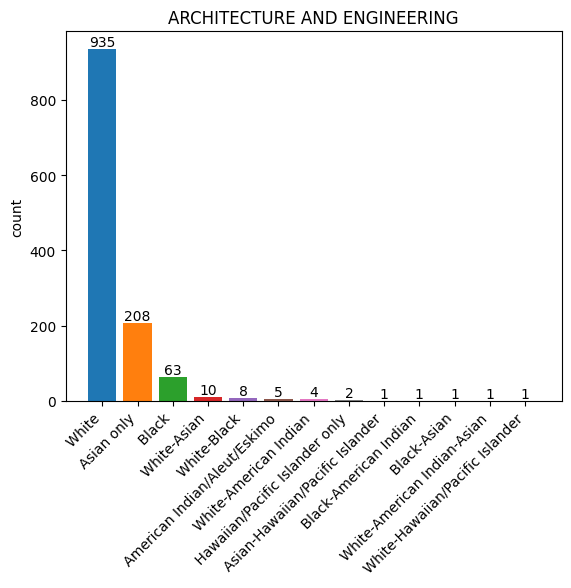

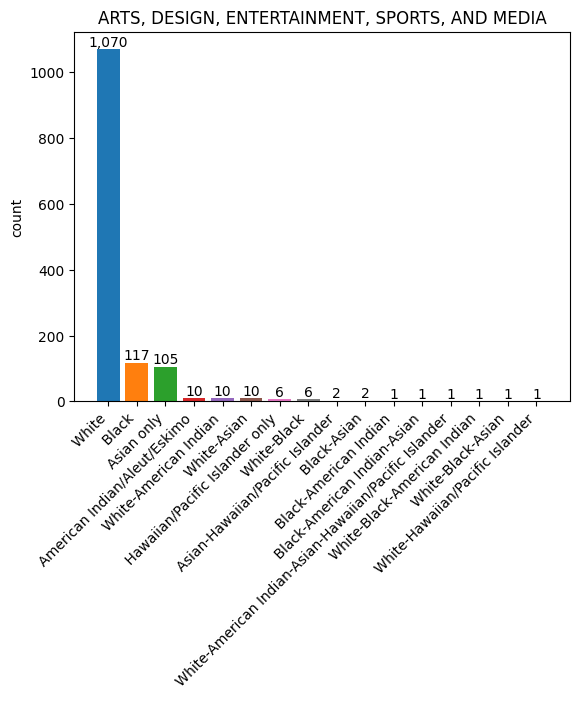

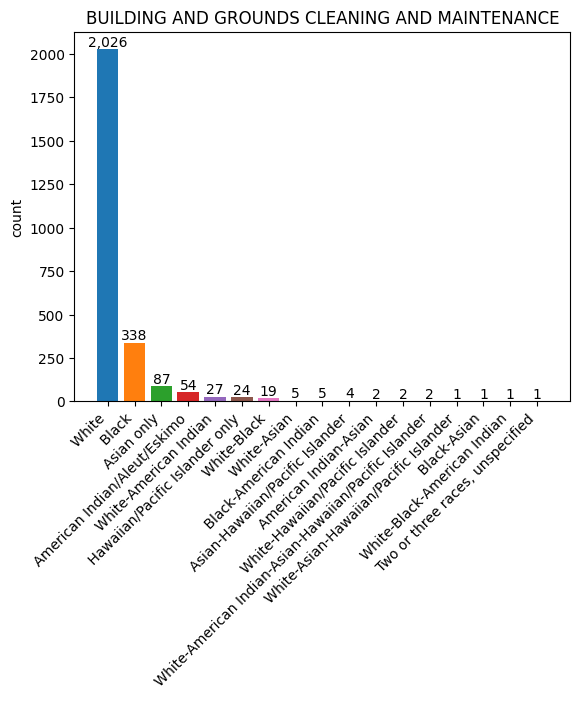

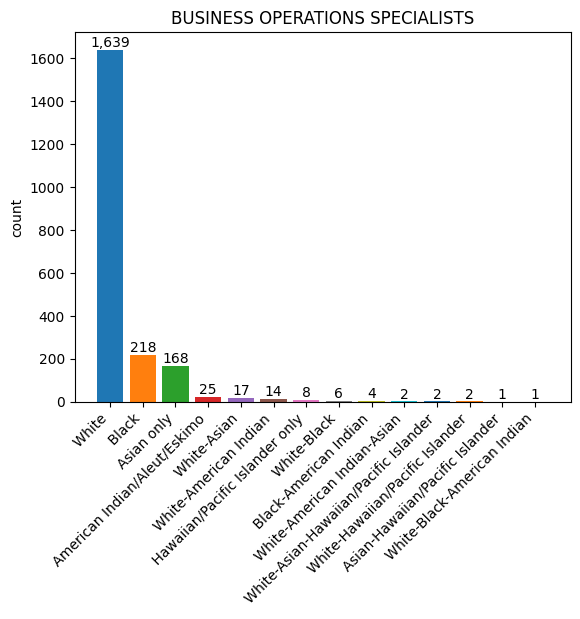

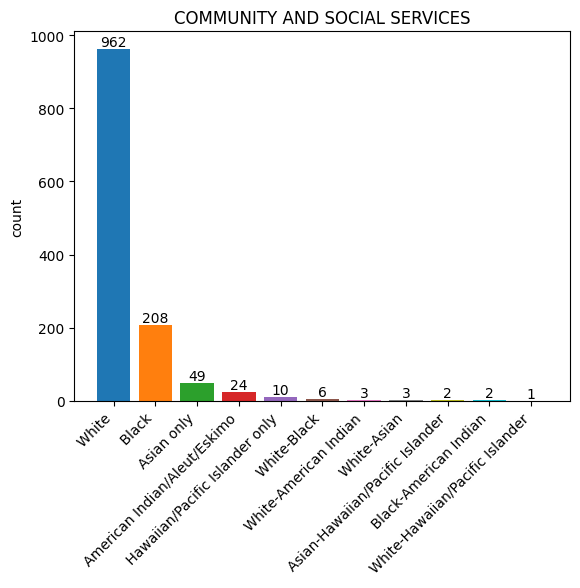

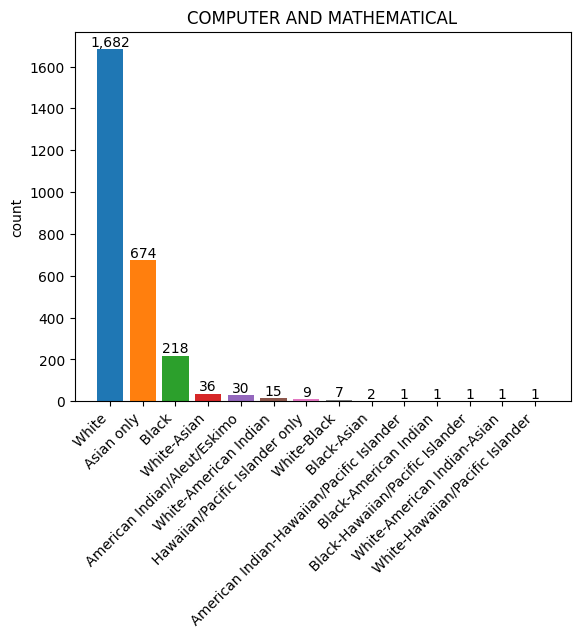

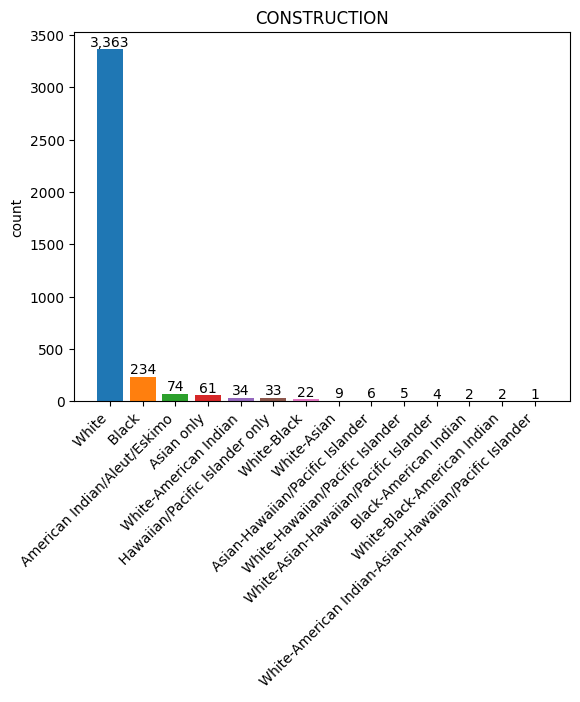

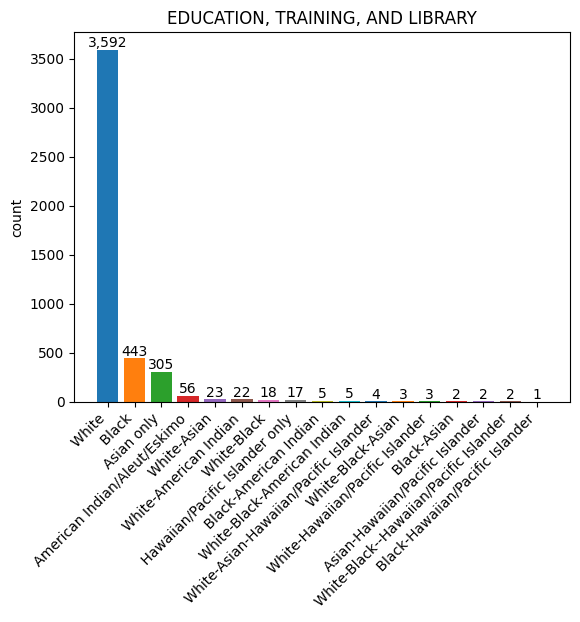

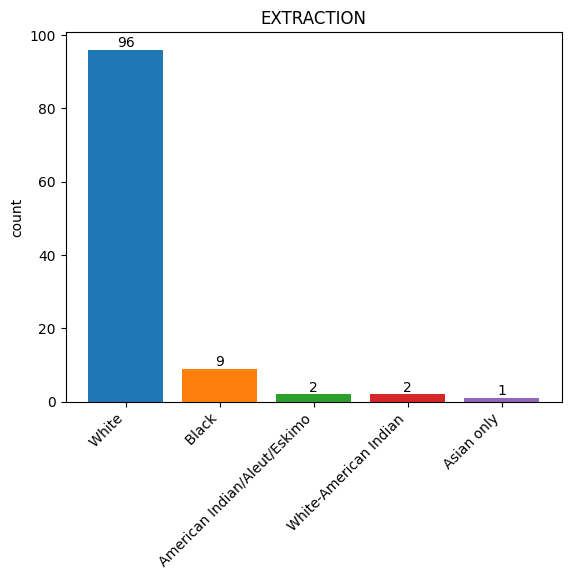

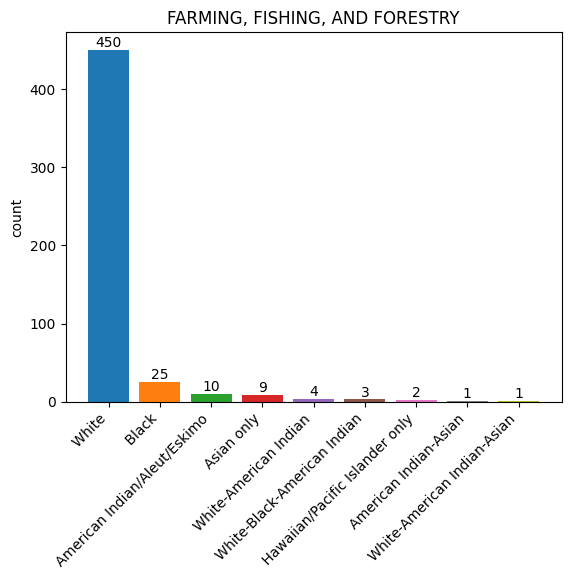

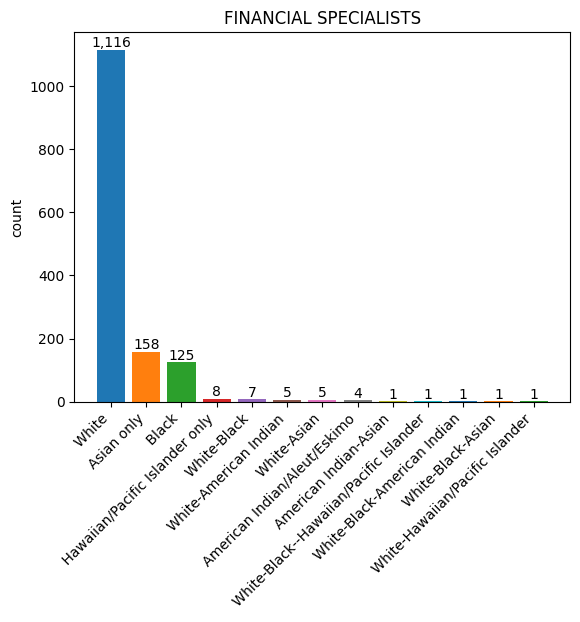

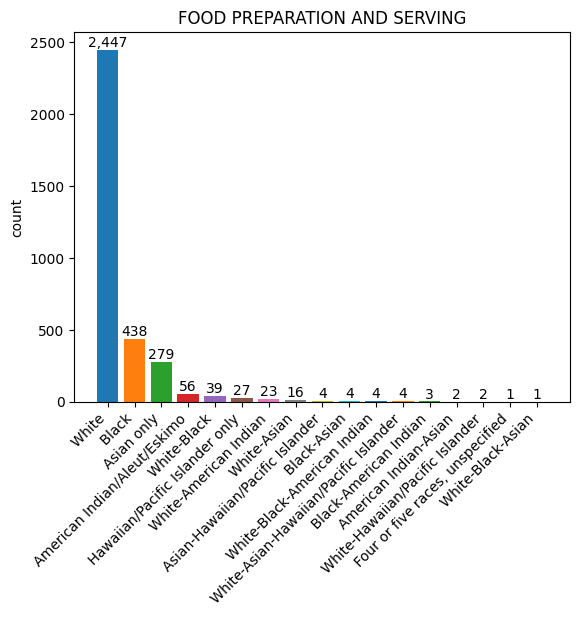

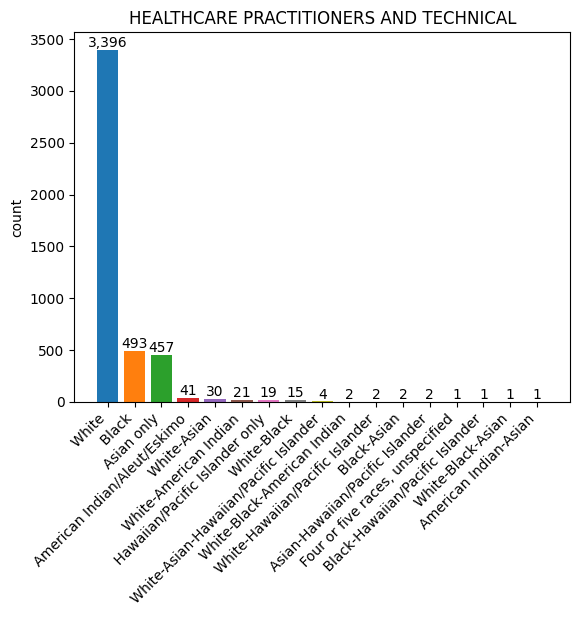

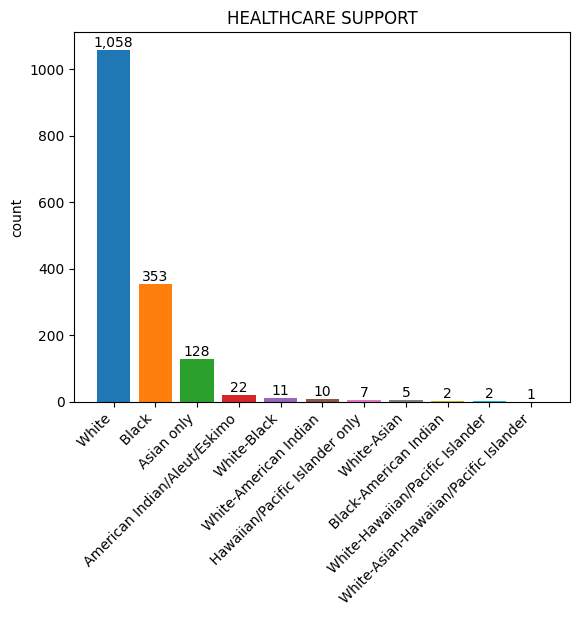

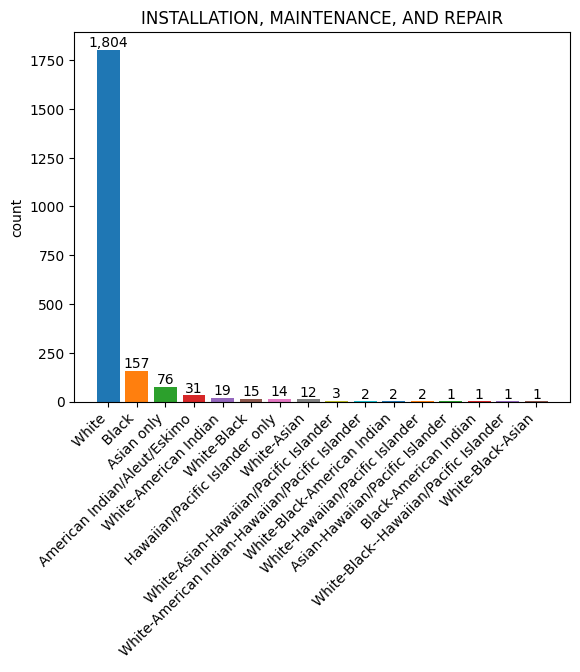

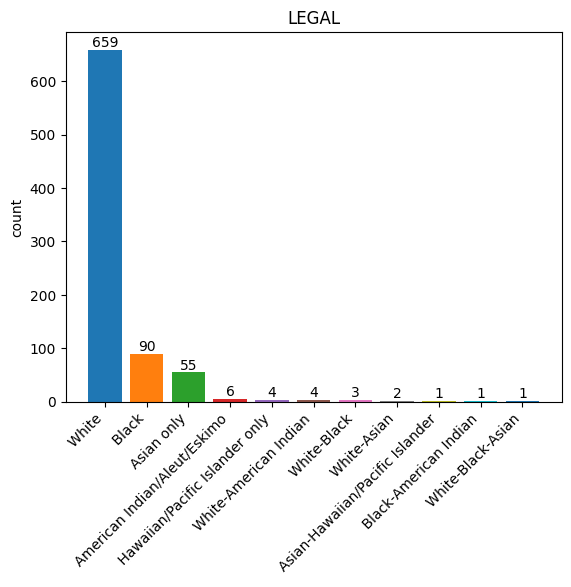

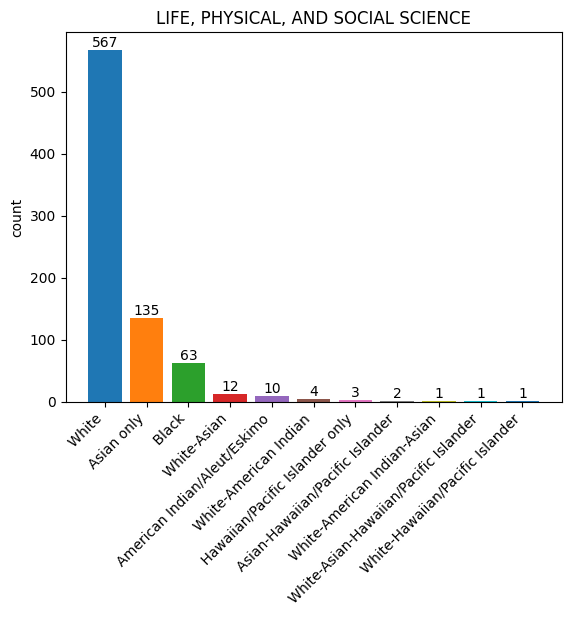

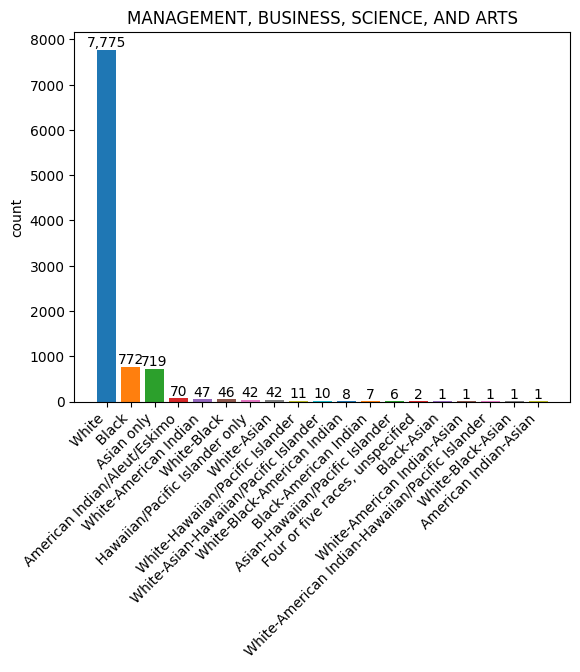

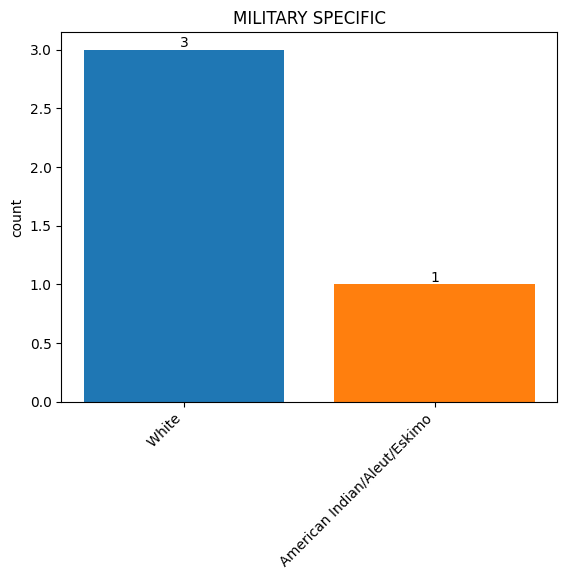

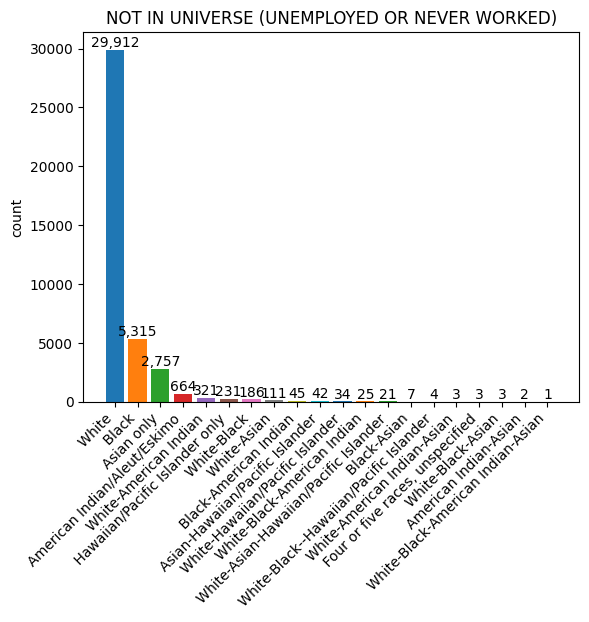

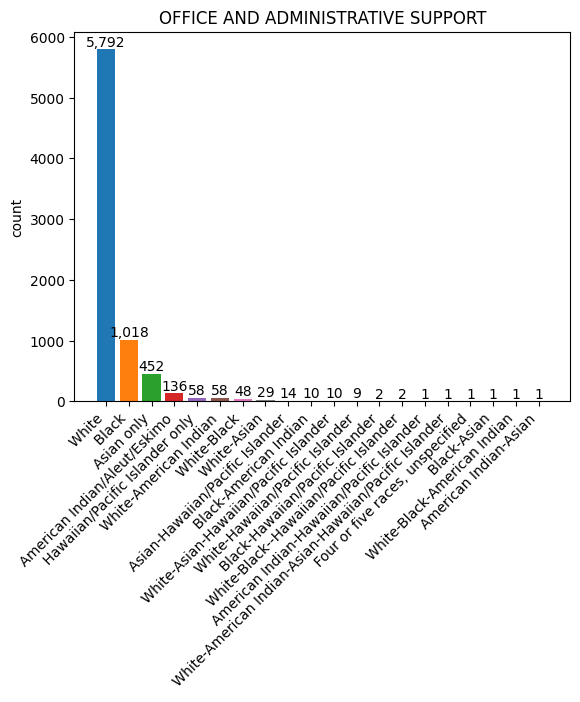

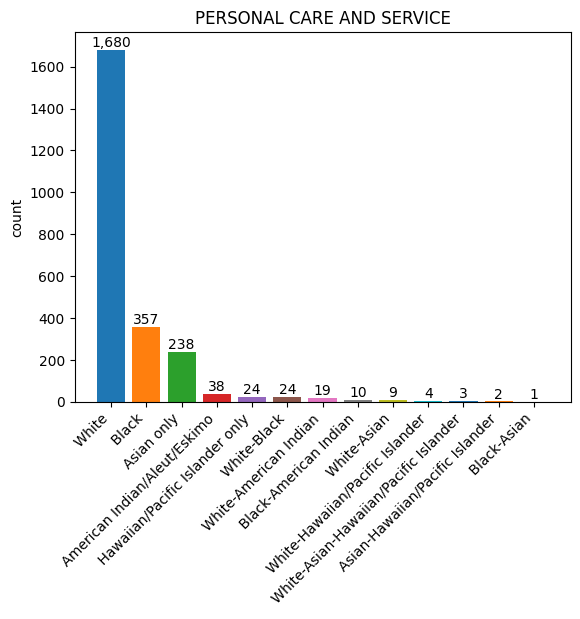

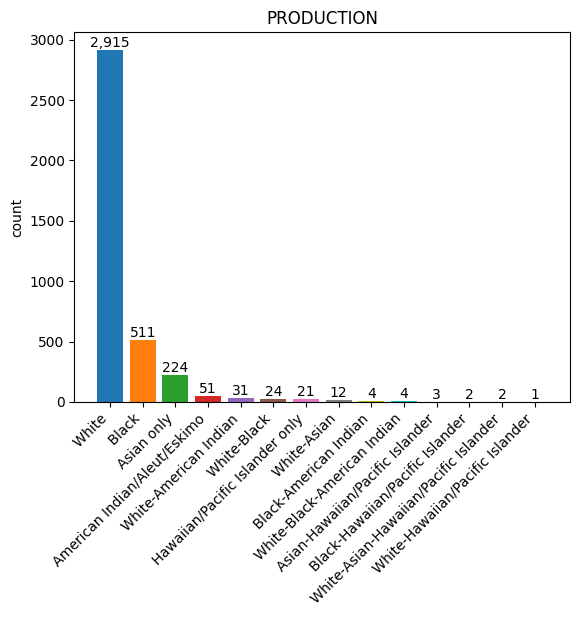

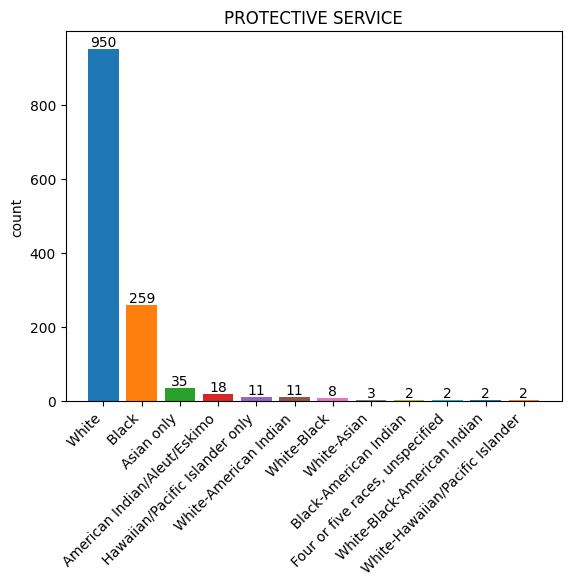

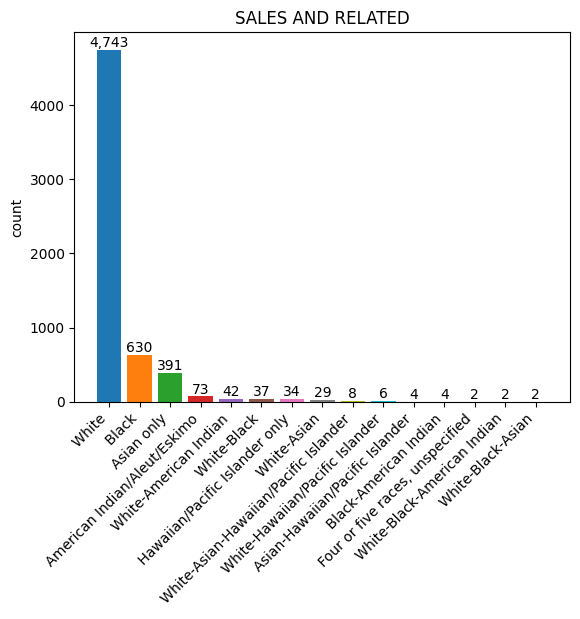

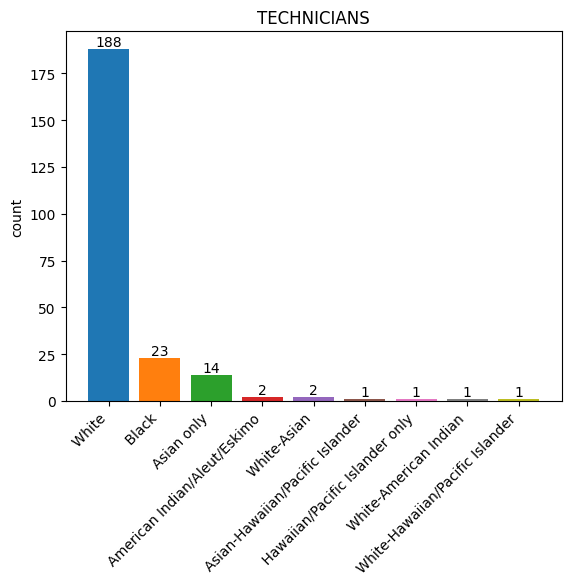

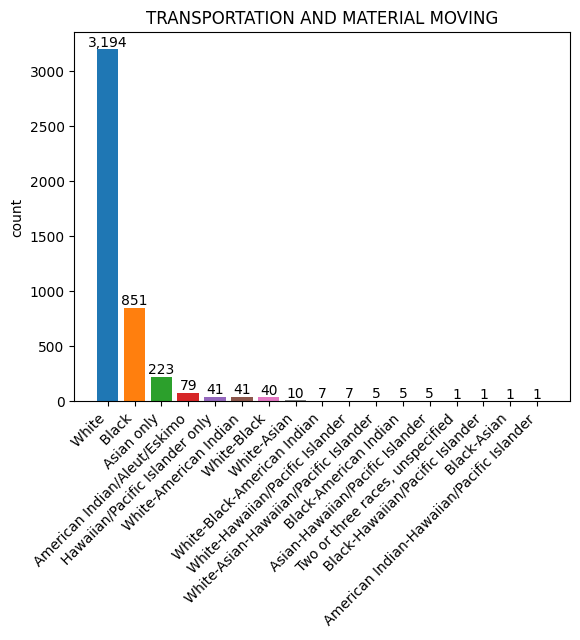

In [30]:
grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
for occupation_category, group_df in grouped_df.groupby('Category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='Category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]
    pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

    array = pivot_df.to_numpy()
    titles = list(pivot_df.columns)

    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(titles)) % cmap.N)

    fig, ax = plt.subplots()
    bar_container = ax.bar(titles, array[0], color = colors)
    ax.set(ylabel='count', title=f'{occupation_category}')
    ax.bar_label(bar_container, fmt='{:,.0f}')
    ax.set_xticklabels(titles, rotation = 45, ha='right')

In [31]:
race_counts = race_occ_df['race_title'].value_counts().rename_axis('race_title').reset_index(name='total_counts')
race_counts

race_title  total_counts
0                                               White         84014
1                                               Black         13328
2                                          Asian only          8008
3                        American Indian/Aleut/Eskimo          1592
4                               White-American Indian           792
5                      Hawaiian/Pacific Islander only           656
6                                         White-Black           595
7                                         White-Asian           442
8                               Black-American Indian           115
9                     Asian-Hawaiian/Pacific Islander           105
10                    White-Hawaiian/Pacific Islander           101
11              White-Asian-Hawaiian/Pacific Islander            83
12                        White-Black-American Indian            71
13                                        Black-Asian            25
14                                  White-Black-Asian            15
15                    Four or five races, unspecified            12
16                              American Indian-Asian            11
17                        White-American Indian-Asian            10
18             White-Black--Hawaiian/Pacific Islander            10
19                    Black-Hawaiian/Pacific Islander             8
20   White-American Indian-Asian-Hawaiian/Pacific ...             5
21          American Indian-Hawaiian/Pacific Islander             3
22    White-American Indian-Hawaiian/Pacific Islander             3
23                    Two or three races, unspecified             2
24                        Black-American Indian-Asian             1
25                  White-Black-American Indian-Asian             1

In [32]:
race_counts['race_title'] = race_counts['race_title'].str.strip()
race_counts[race_counts['race_title'] == 'White']['total_counts']

0    84014
Name: total_counts, dtype: int64

C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\459215832.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\459215832.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('Category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_8088\459215832.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, rotation

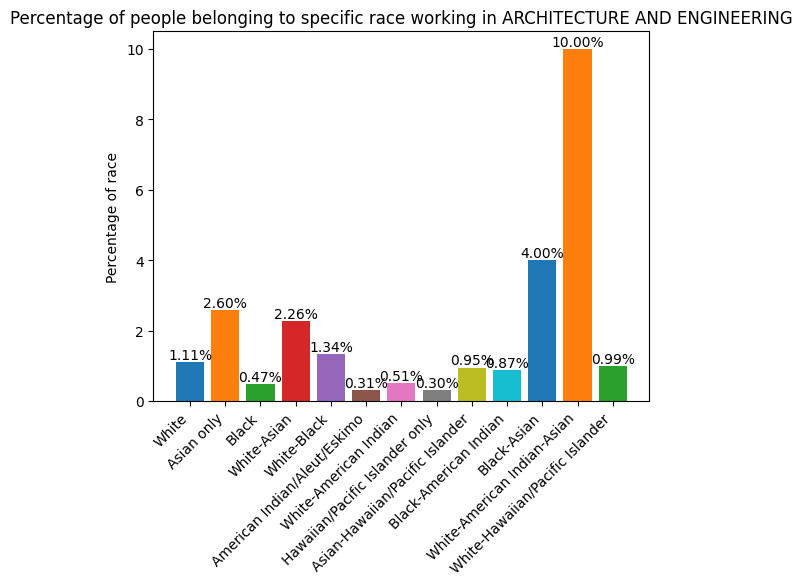

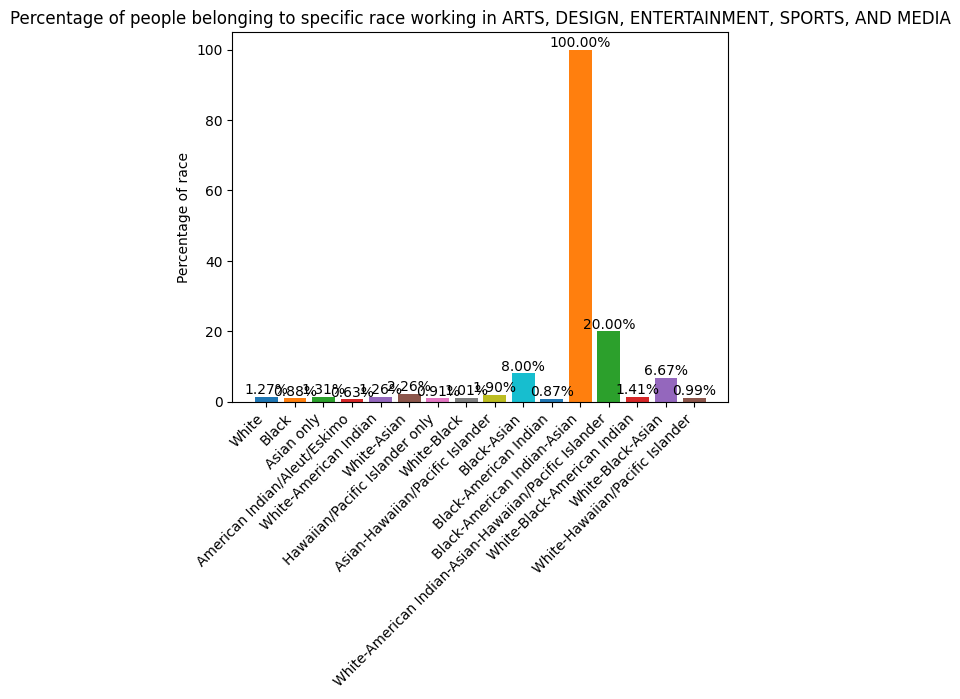

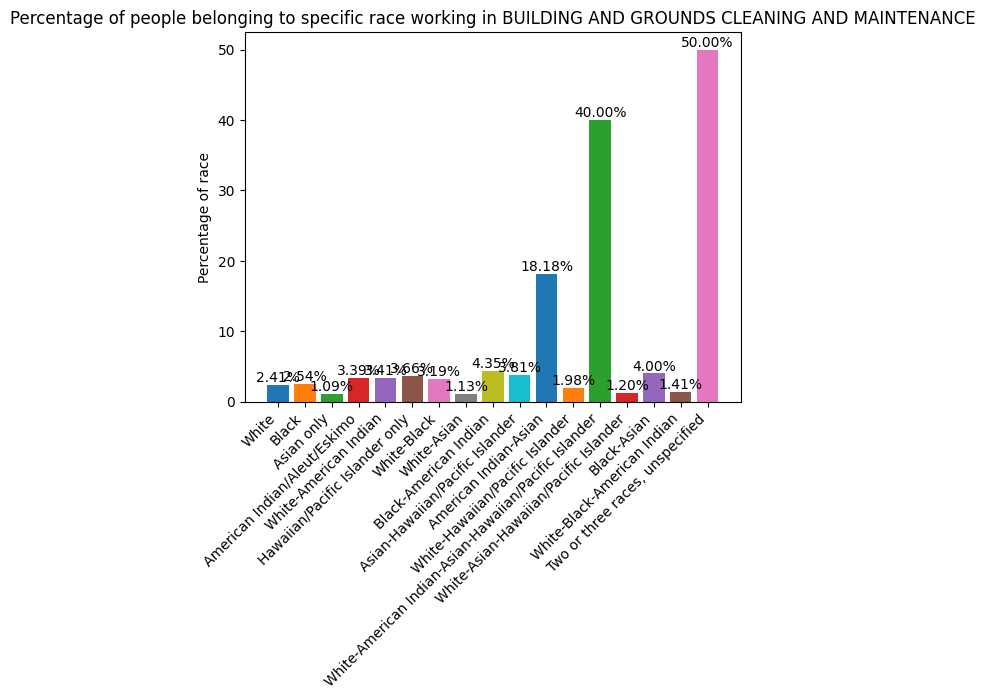

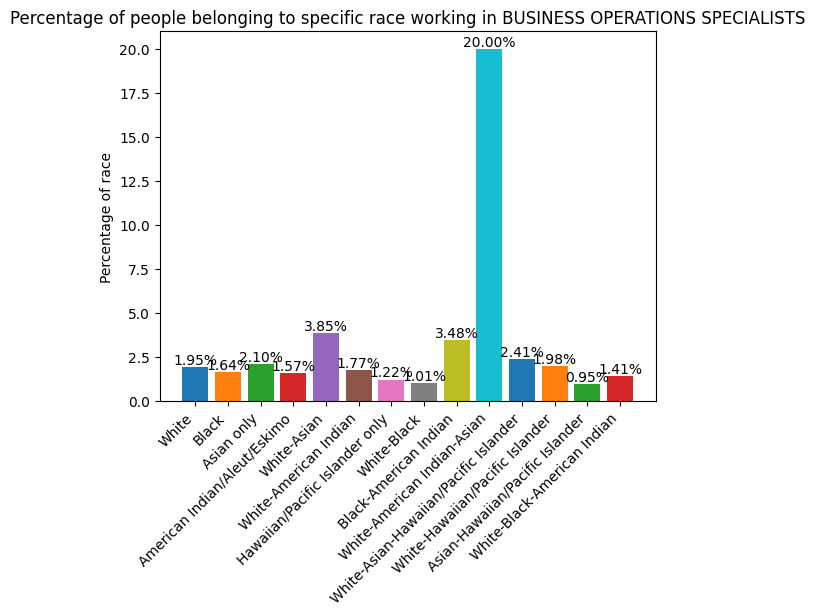

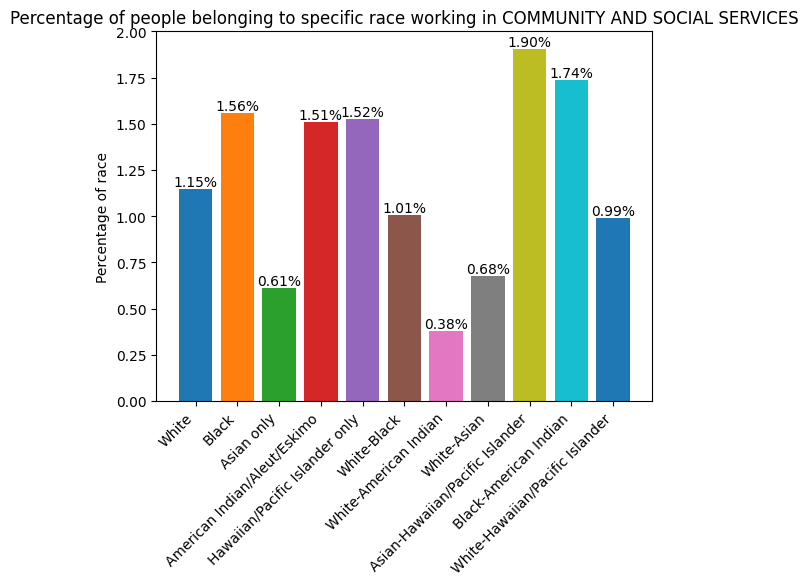

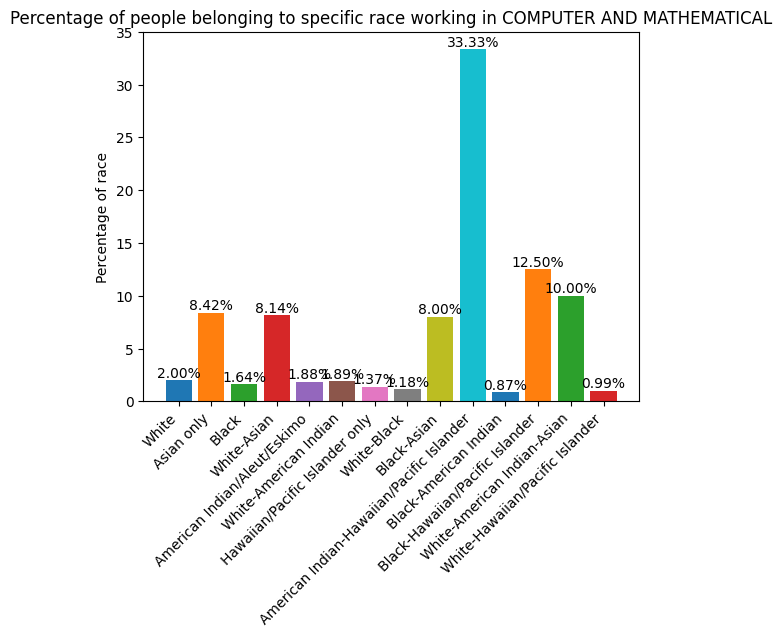

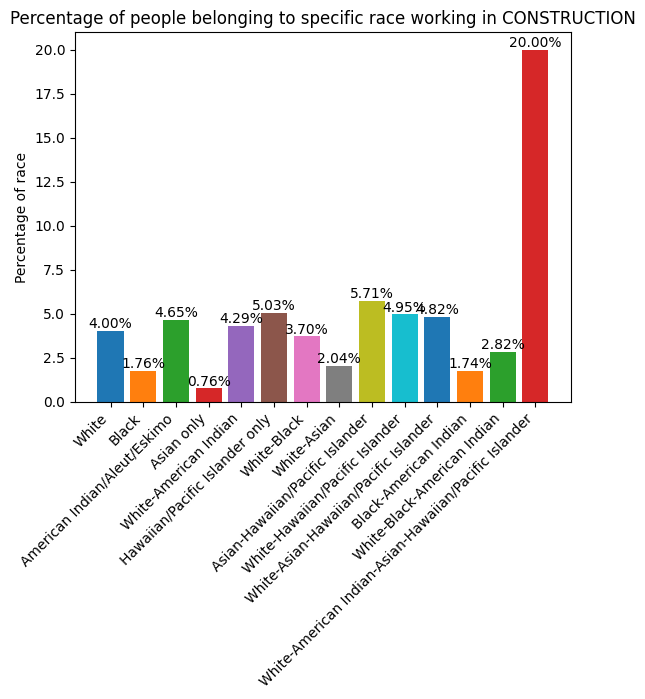

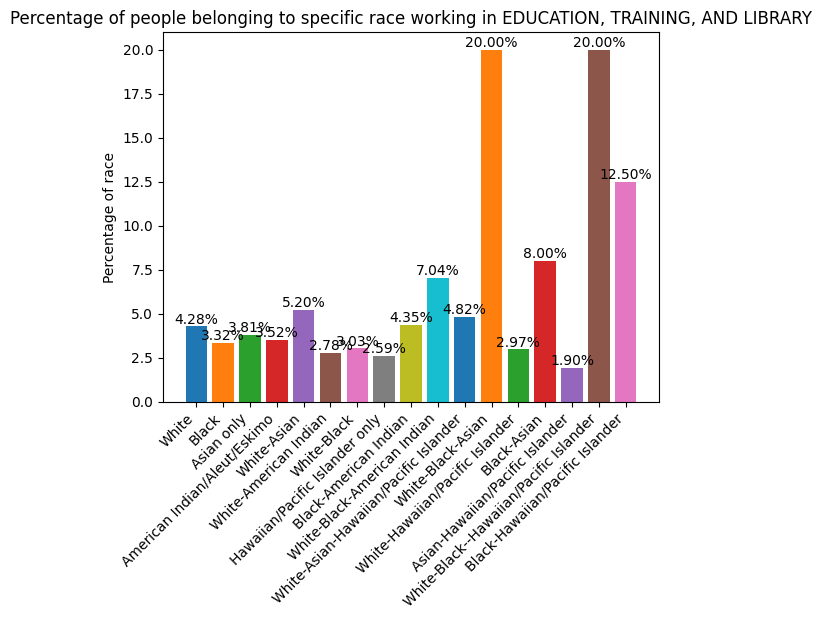

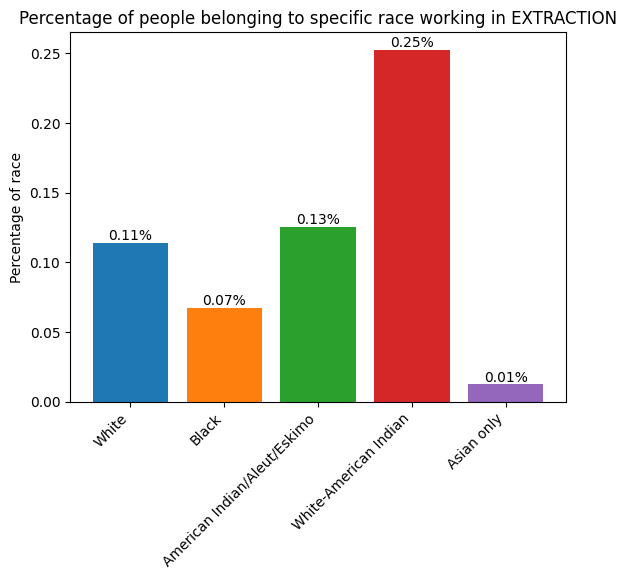

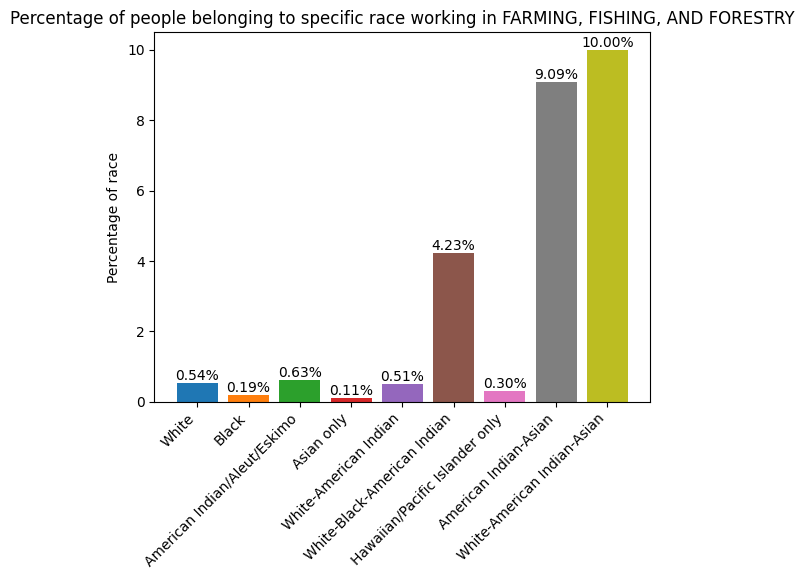

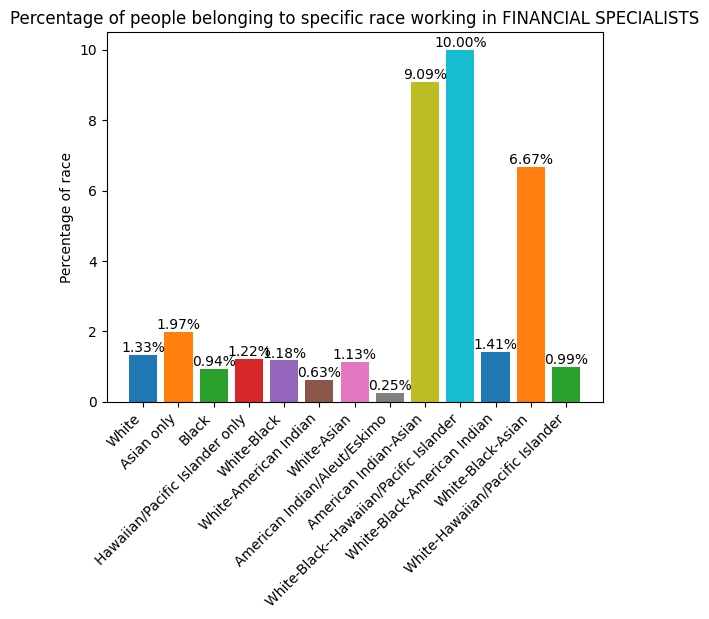

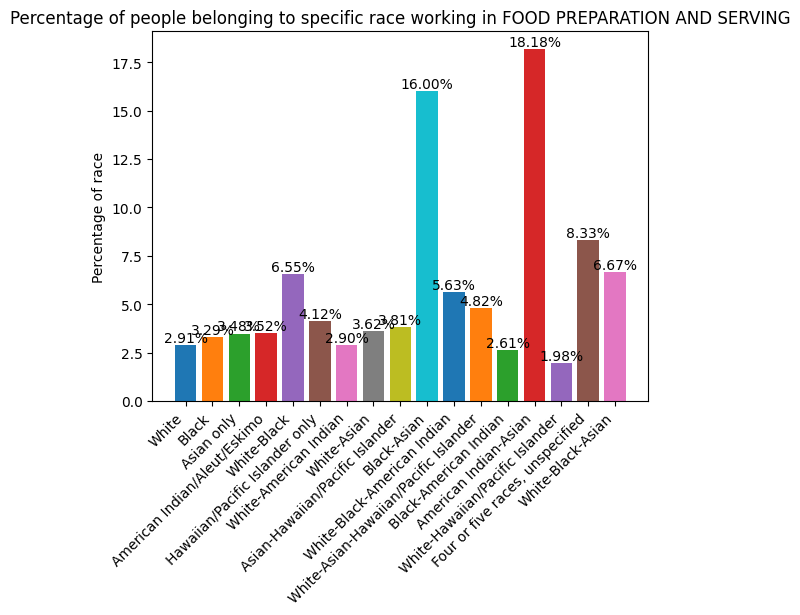

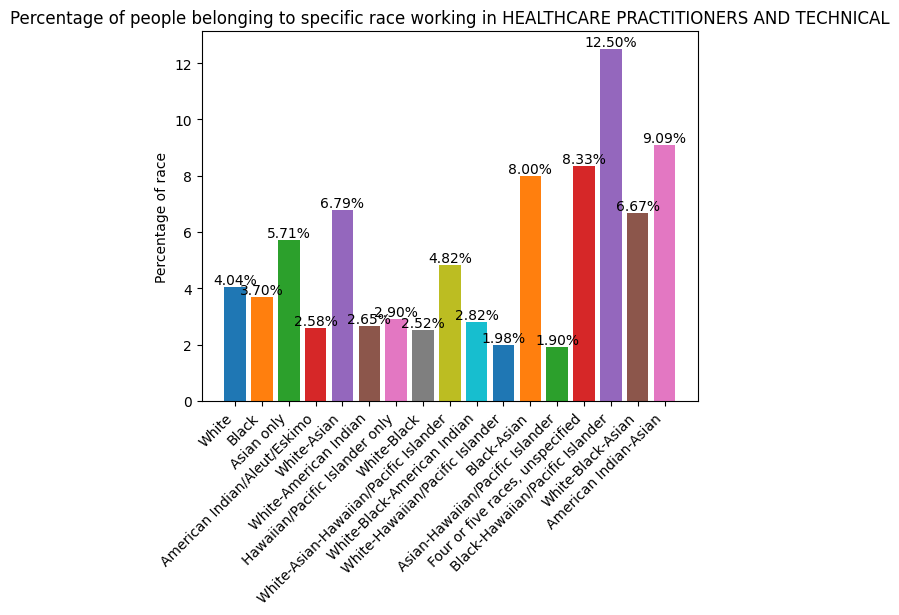

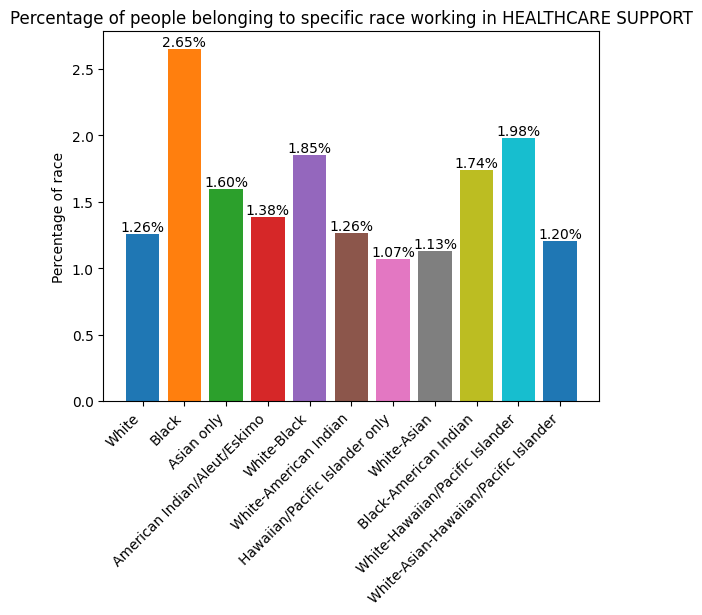

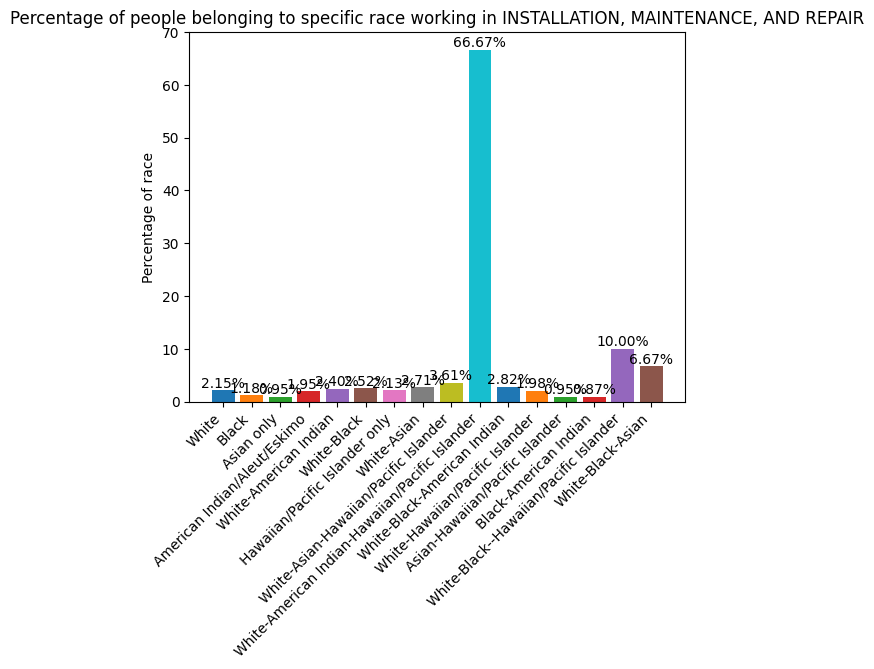

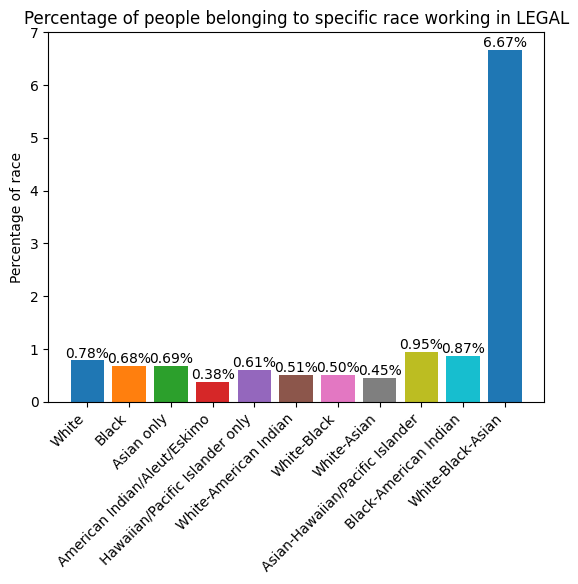

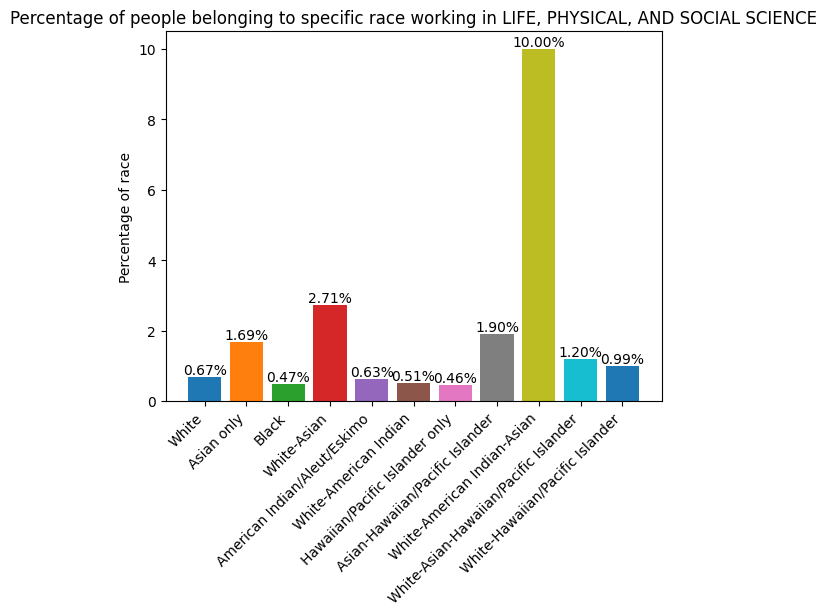

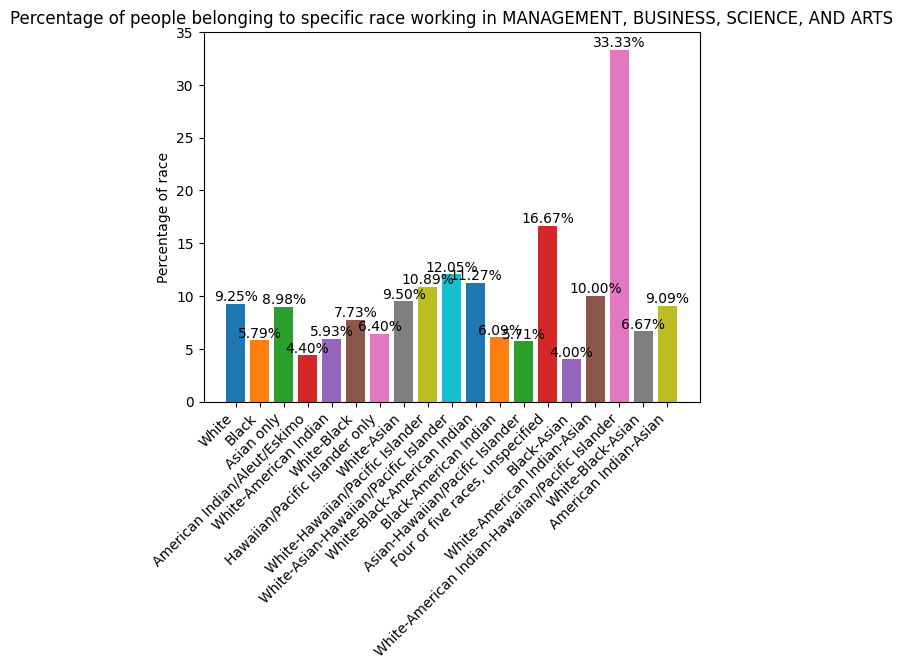

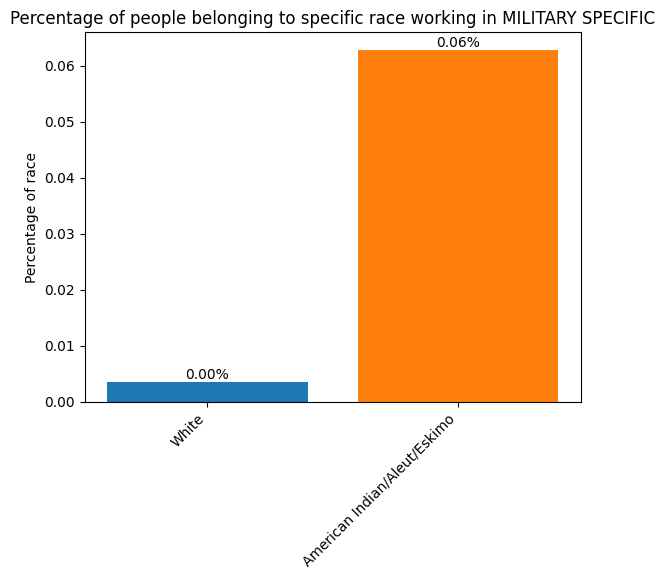

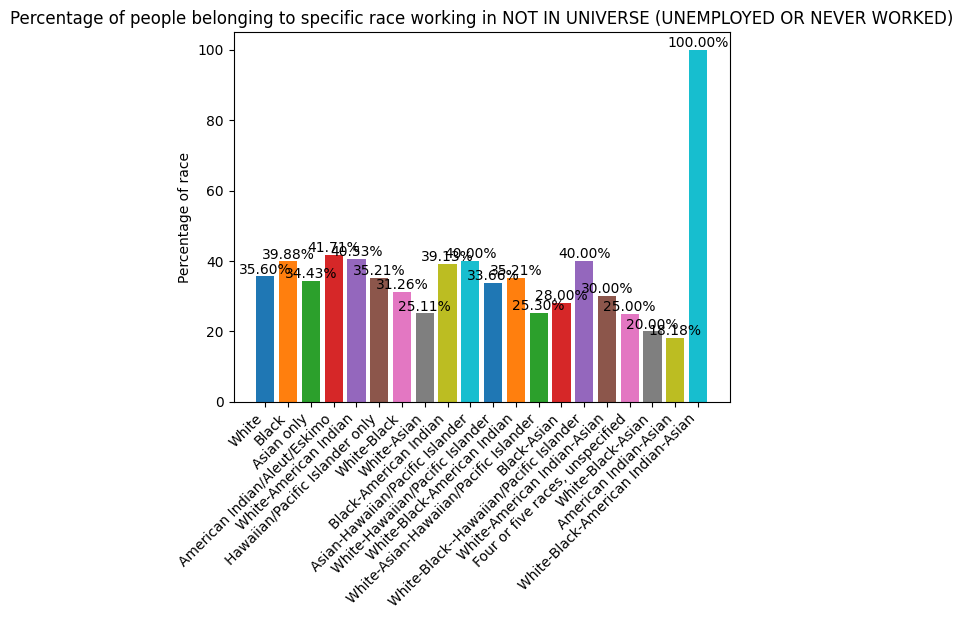

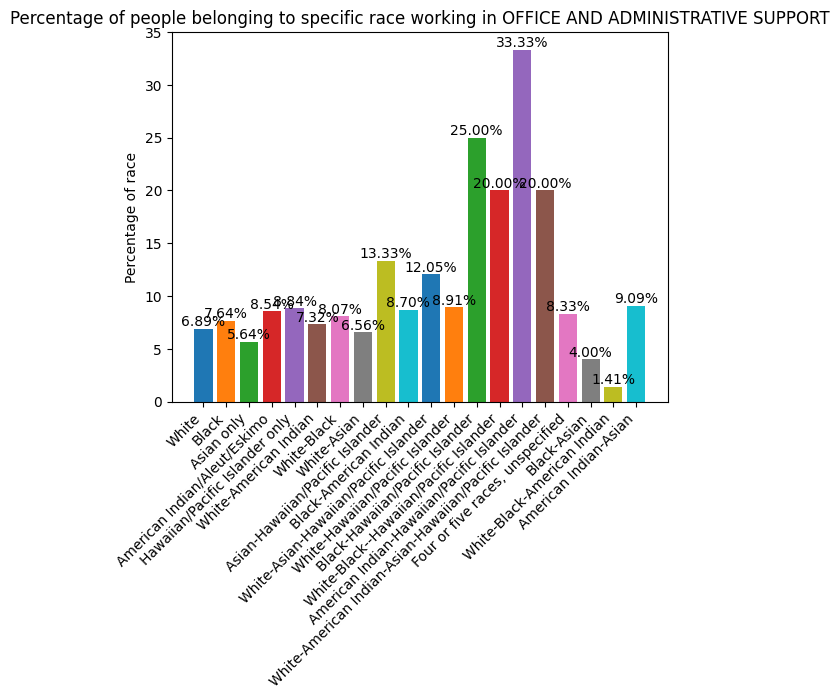

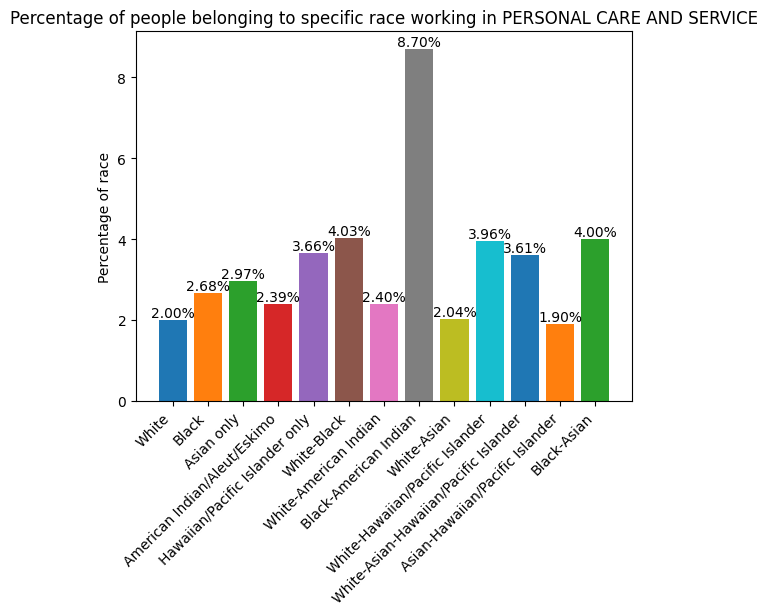

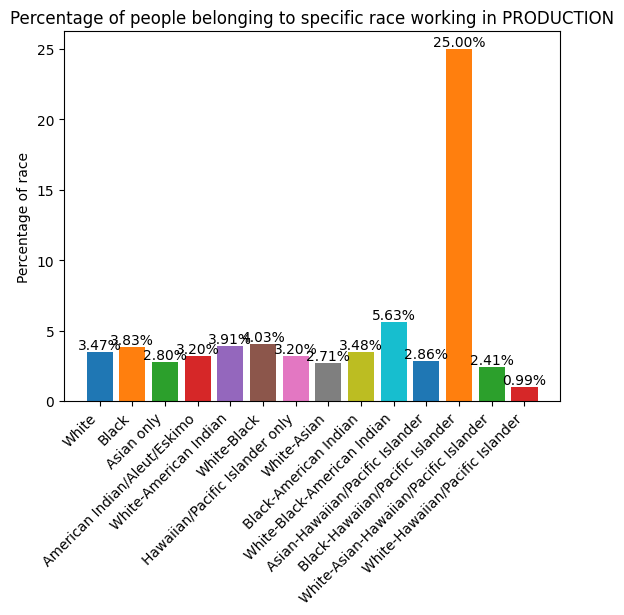

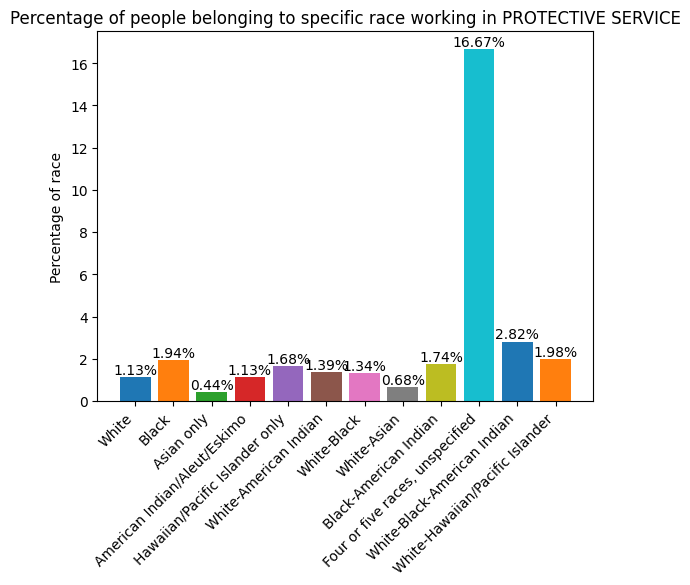

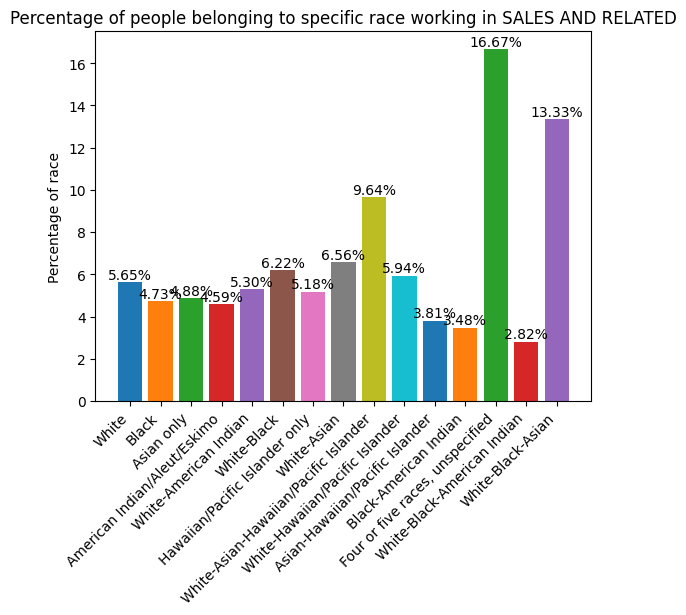

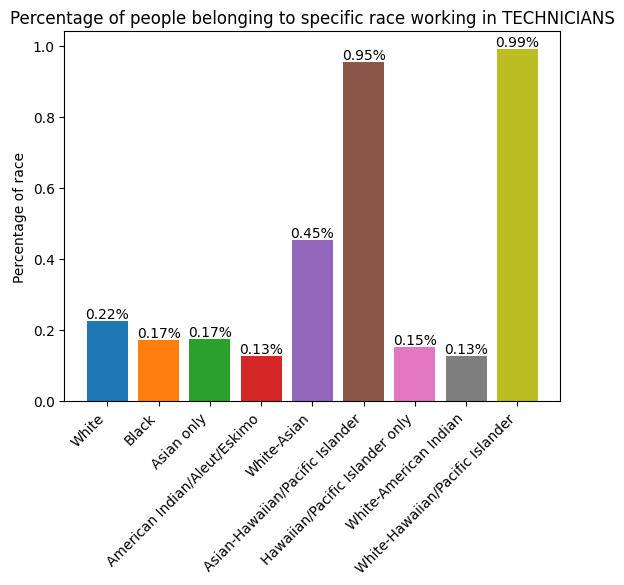

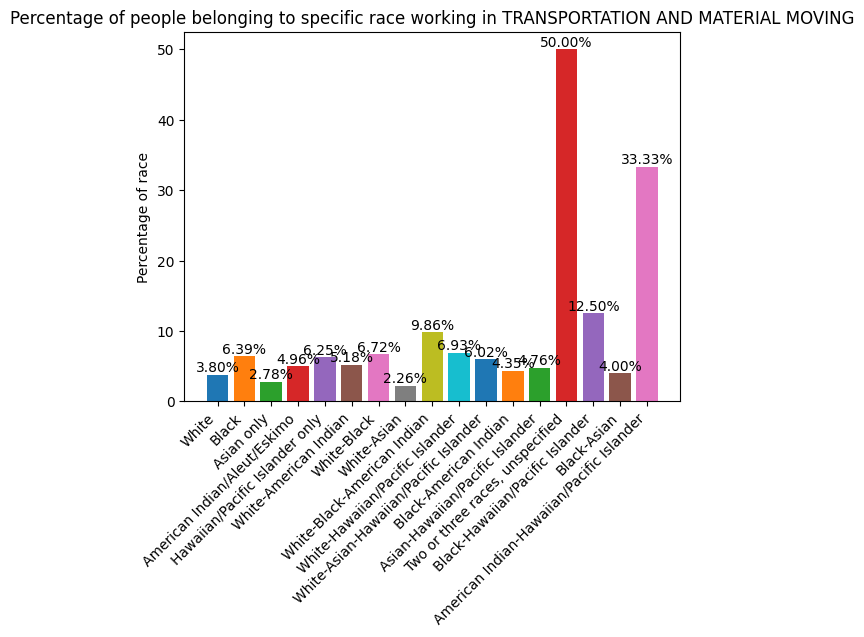

In [45]:
grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
for occupation_category, group_df in grouped_df.groupby('Category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='Category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

    array = pivot_df.to_numpy()
    array = array[0]
    titles = list(pivot_df.columns.str.strip())

    current_title = 0
    relative_array = []
    for count in array:
        relative_array.append(100 / race_counts[race_counts['race_title'] == titles[current_title]]['total_counts'].item() * count)
        current_title += 1

    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(titles)) % cmap.N)

    fig, ax = plt.subplots()
    bar_container = ax.bar(titles, relative_array, color = colors)
    ax.set(ylabel='Percentage of race', title=f'Percentage of people belonging to specific race working in {occupation_category}')
    ax.bar_label(bar_container, fmt=lambda x: f'{x:.2f}%')
    ax.set_xticklabels(titles, rotation = 45, ha='right')

In [256]:
grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
grouped_df['percentage'] = 100 / race_occ_df

C:\Users\jputz\AppData\Local\Temp\ipykernel_27480\3040637143.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')


Category  \
0          ARCHITECTURE AND ENGINEERING   
1          ARCHITECTURE AND ENGINEERING   
2          ARCHITECTURE AND ENGINEERING   
3          ARCHITECTURE AND ENGINEERING   
4          ARCHITECTURE AND ENGINEERING   
..                                  ...   
697  TRANSPORTATION AND MATERIAL MOVING   
698  TRANSPORTATION AND MATERIAL MOVING   
699  TRANSPORTATION AND MATERIAL MOVING   
700  TRANSPORTATION AND MATERIAL MOVING   
701  TRANSPORTATION AND MATERIAL MOVING   

                                     race_title  count  
0                         American Indian-Asian      0  
1     American Indian-Hawaiian/Pacific Islander      0  
2                  American Indian/Aleut/Eskimo      5  
3                                    Asian only    208  
4               Asian-Hawaiian/Pacific Islander      1  
..                                          ...    ...  
697      White-Black--Hawaiian/Pacific Islander      0  
698                 White-Black-American Indian      7  
699           White-Black-American Indian-Asian      0  
700                           White-Black-Asian      0  
701             White-Hawaiian/Pacific Islander      7  

[702 rows x 3 columns]

C:\Users\jputz\AppData\Local\Temp\ipykernel_27480\2922248586.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
C:\Users\jputz\AppData\Local\Temp\ipykernel_27480\2922248586.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for occupation_category, group_df in grouped_df.groupby('Category'):
C:\Users\jputz\AppData\Local\Temp\ipykernel_27480\2922248586.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(titles, ro

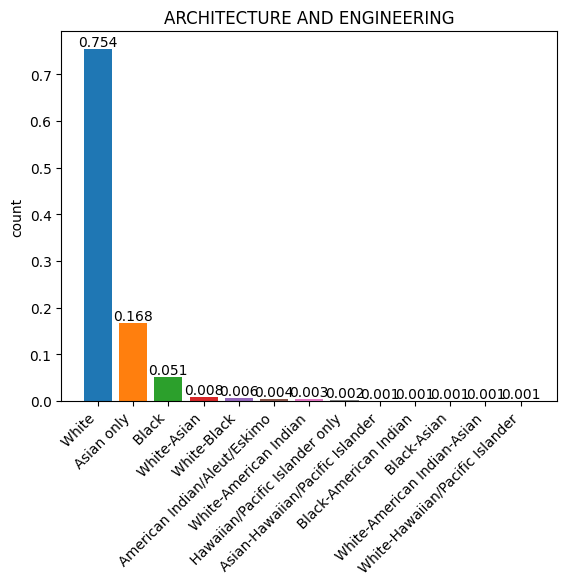

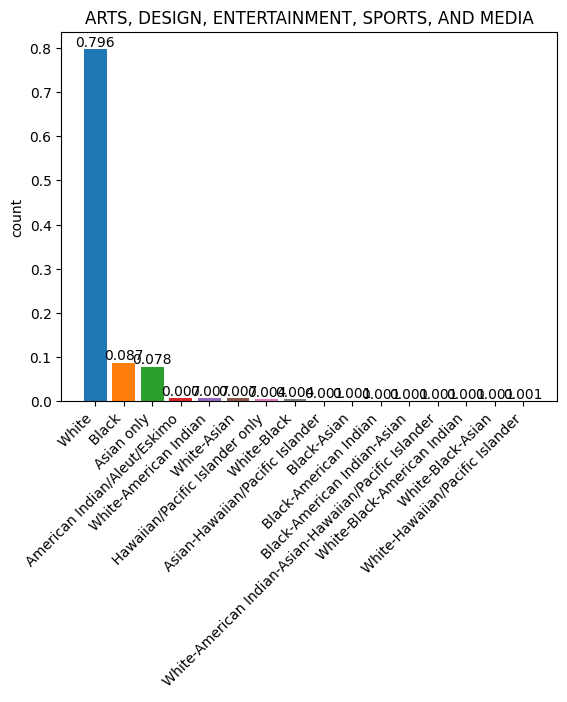

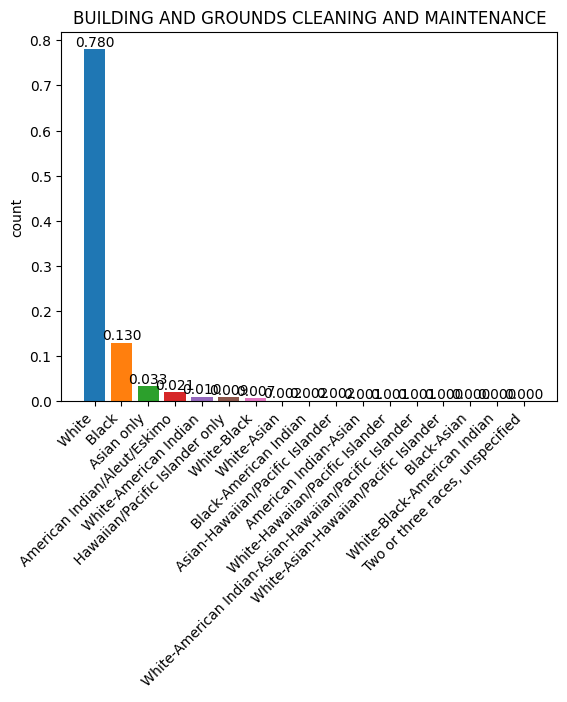

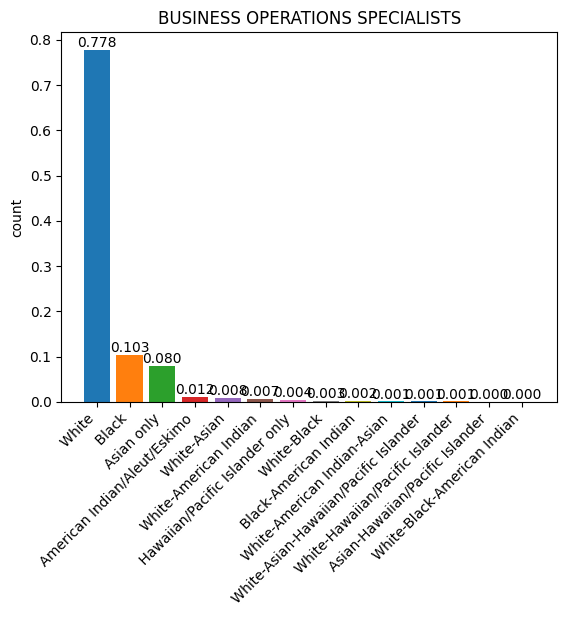

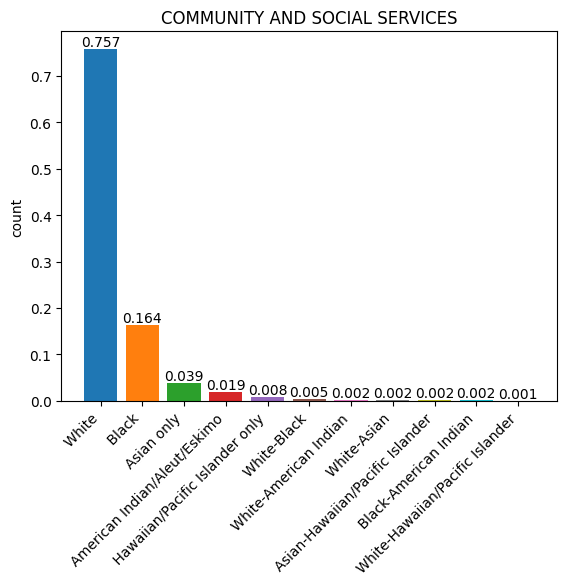

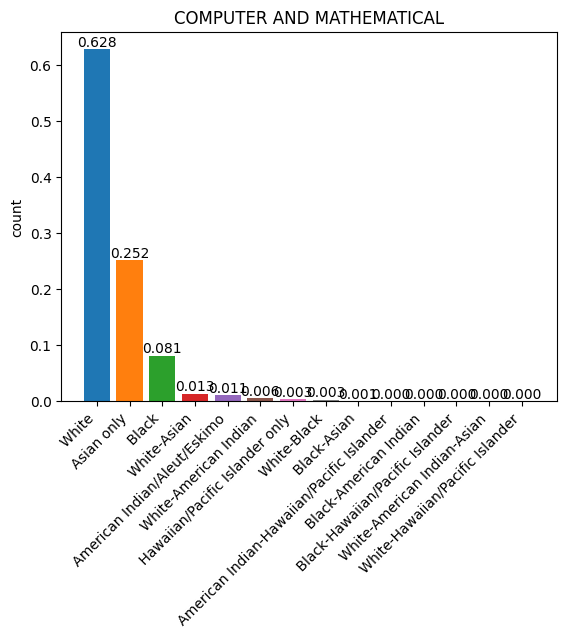

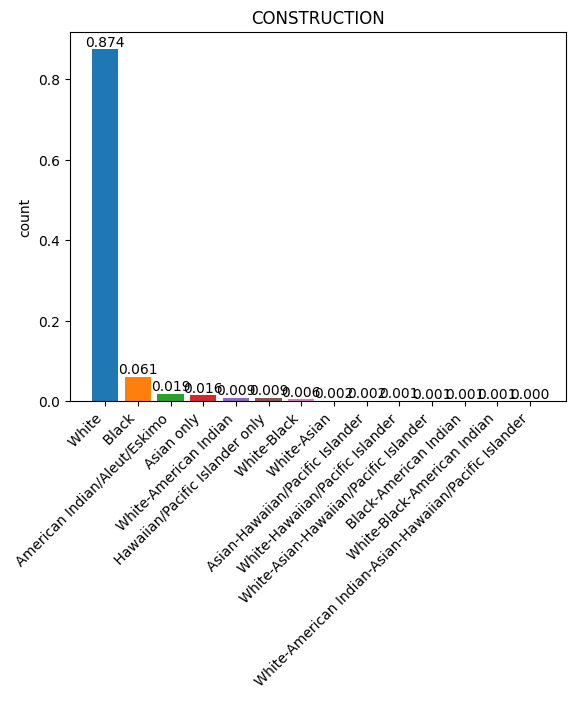

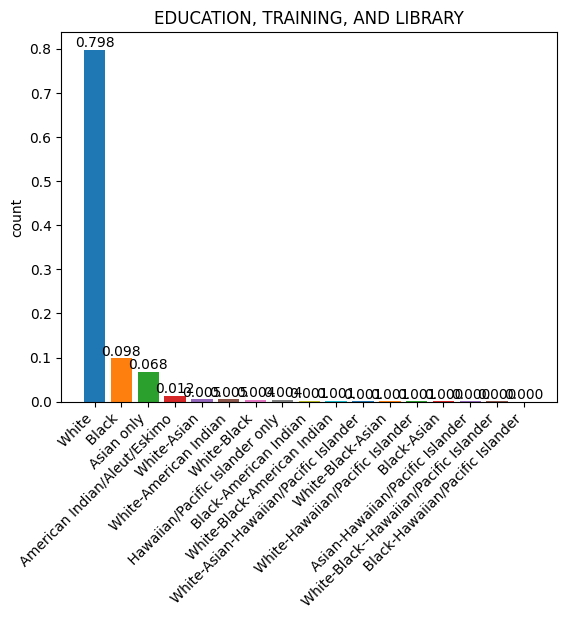

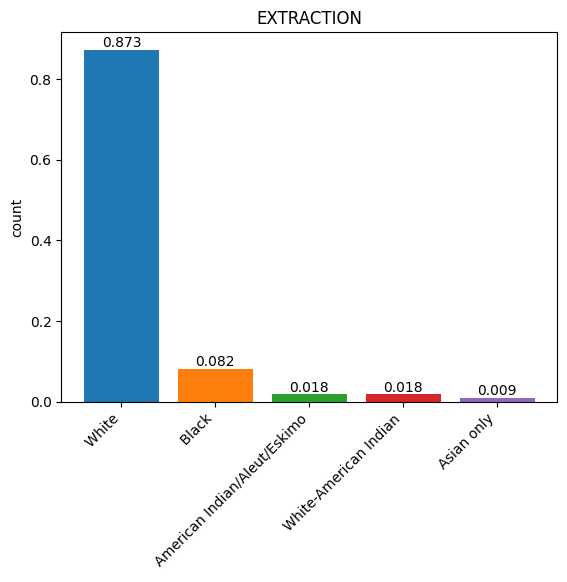

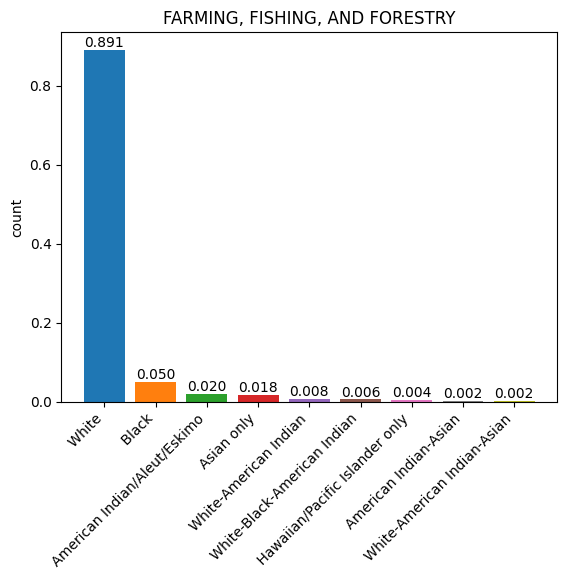

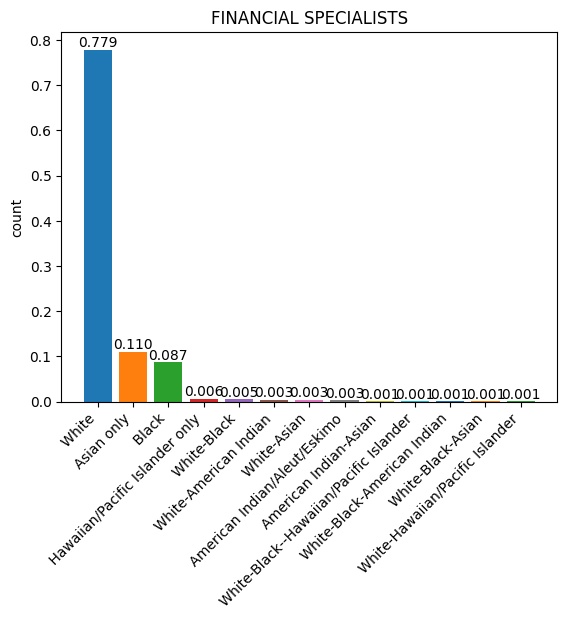

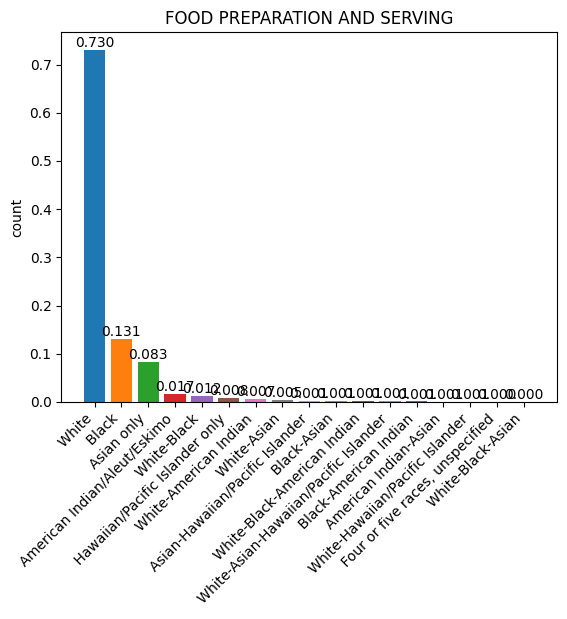

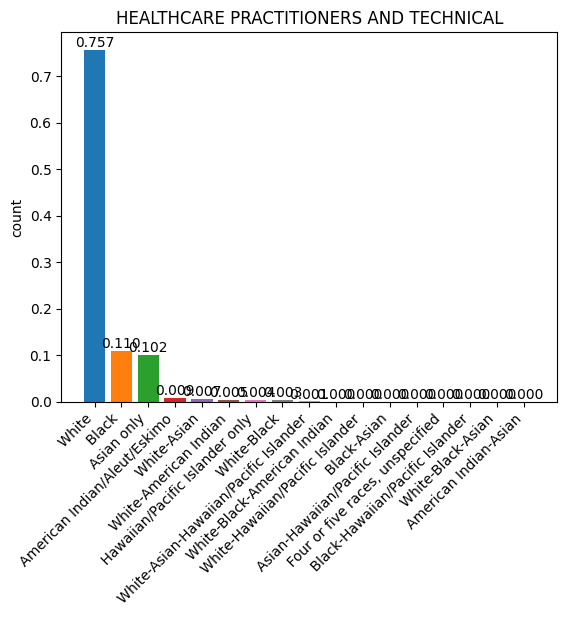

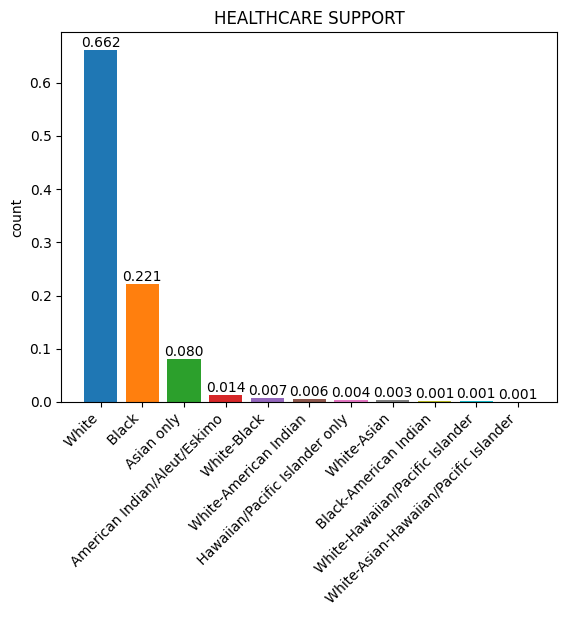

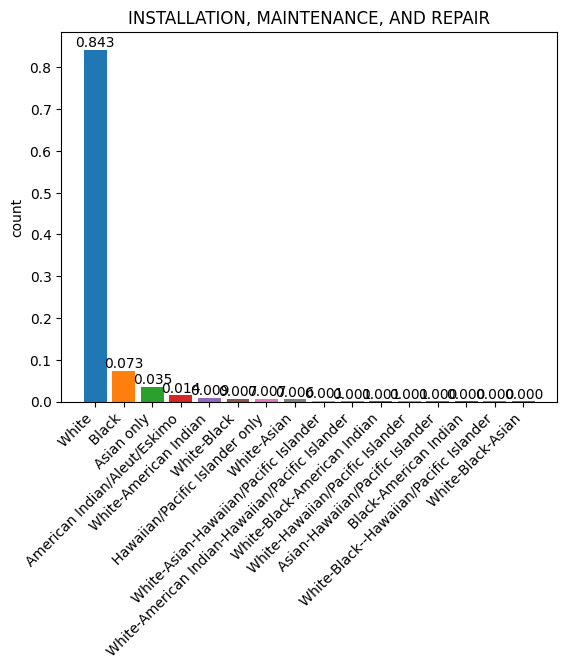

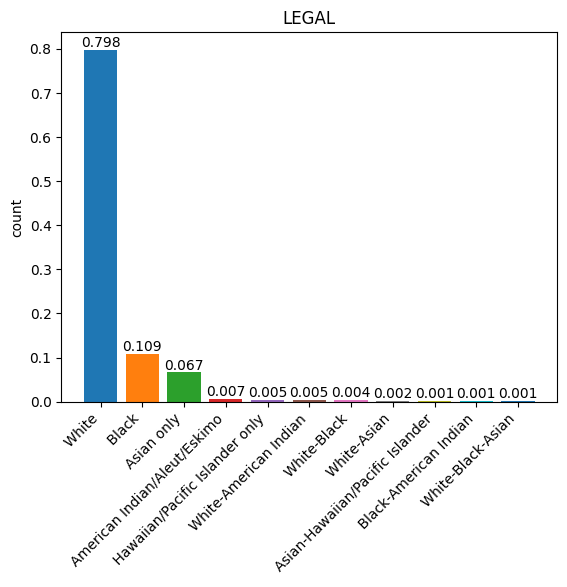

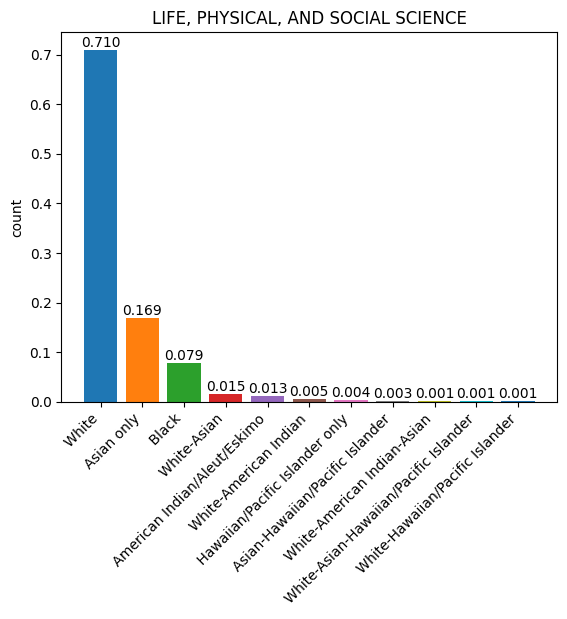

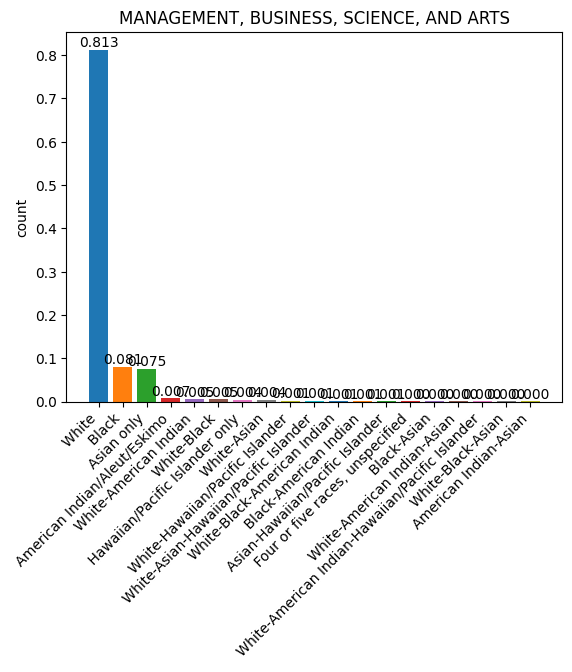

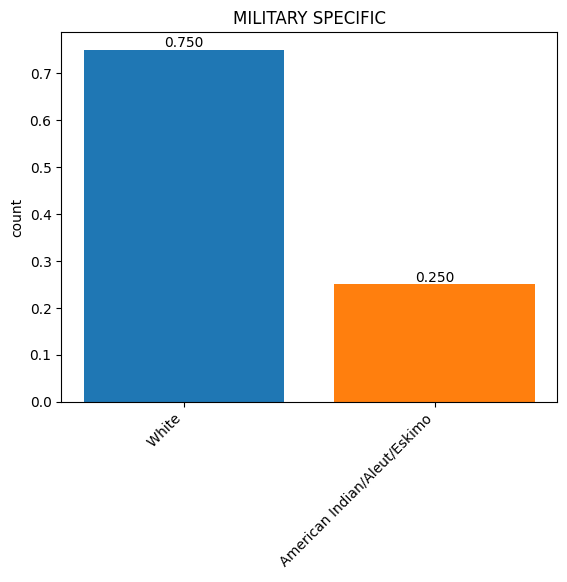

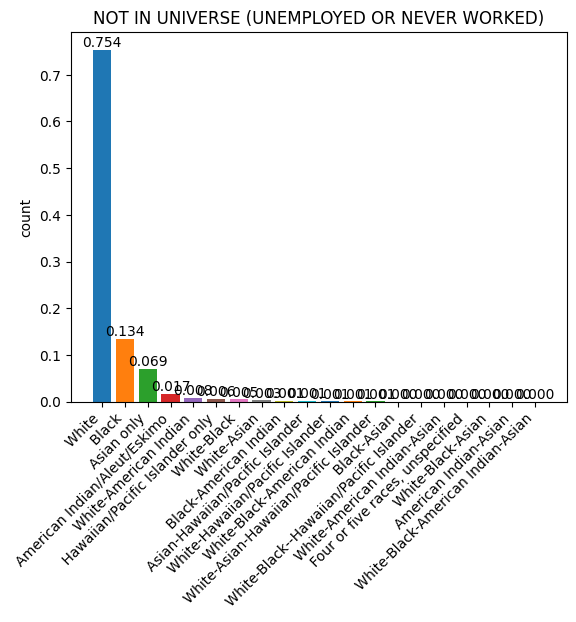

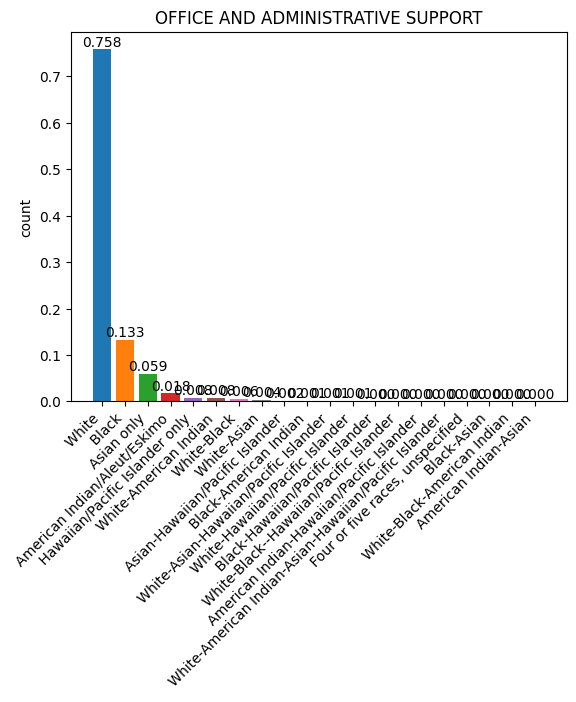

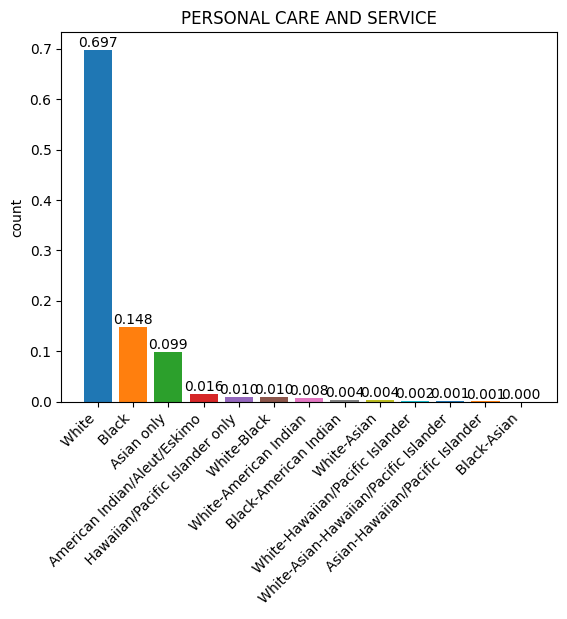

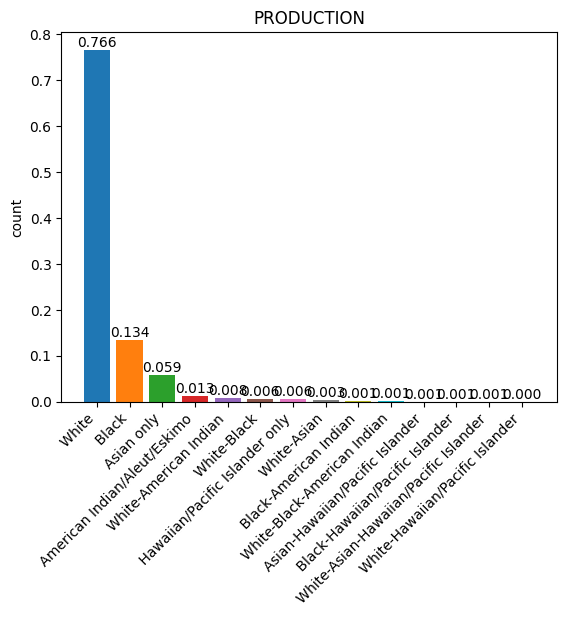

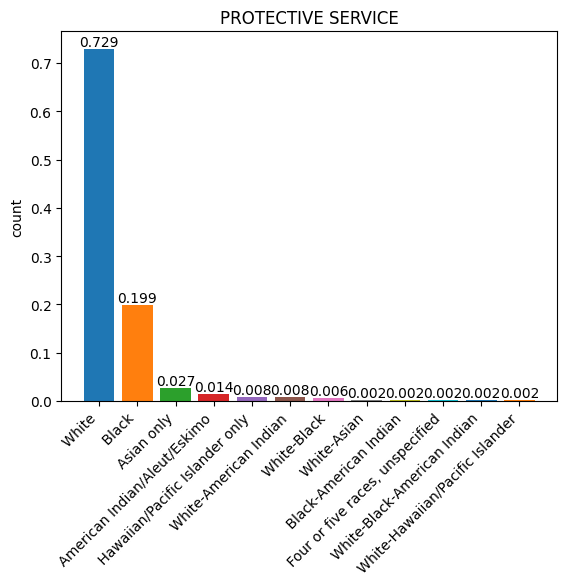

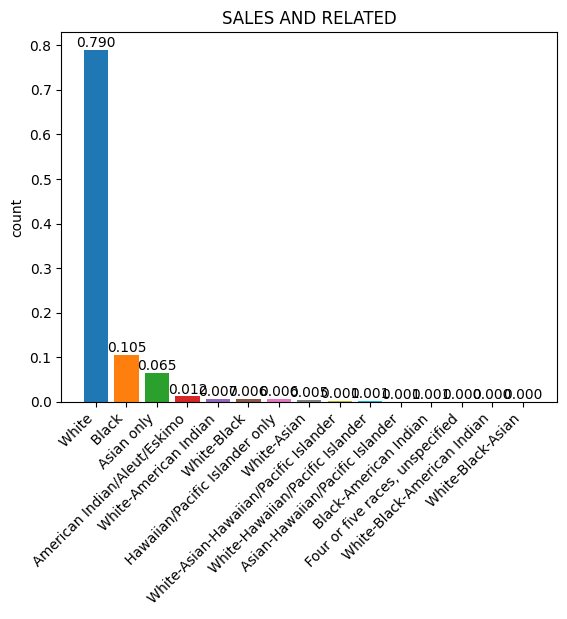

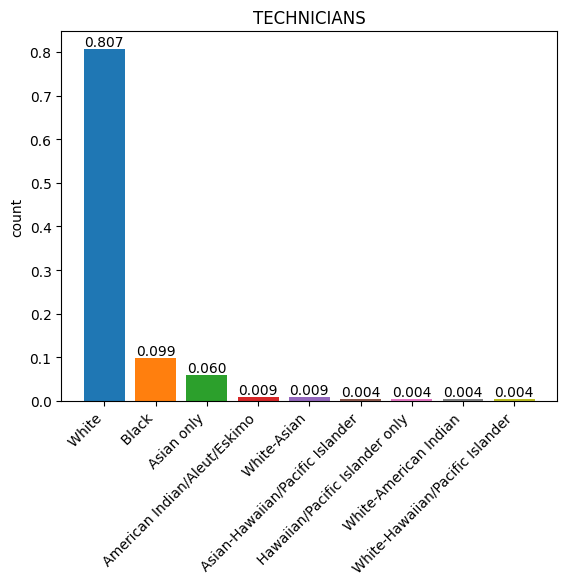

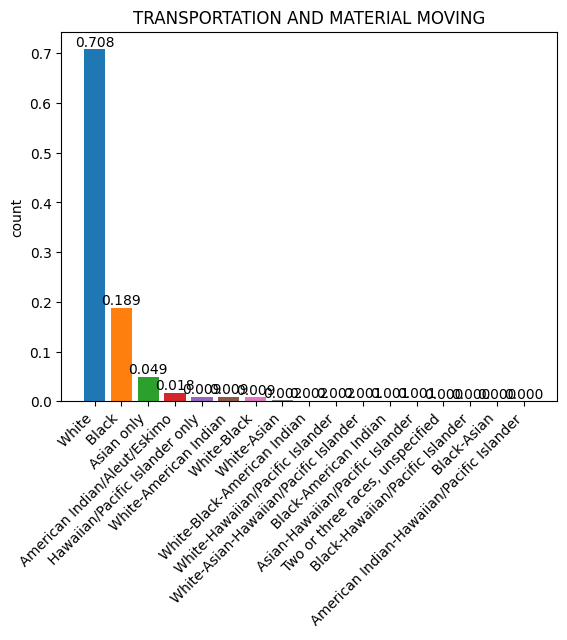

In [265]:
grouped_df = race_occ_df.groupby(['Category', 'race_title']).size().reset_index(name='count')
for occupation_category, group_df in grouped_df.groupby('Category'):
    # Pivot the DataFrame to have 'race_title' as columns and 'count' as values
    pivot_df = group_df.pivot(index='Category', columns='race_title', values='count').fillna(0)
    # only select those races which are present in the category
    pivot_df = pivot_df.loc[:, (pivot_df != 0).any(axis=0)]

    pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)
    pivot_df = pivot_df.sort_values(by = f'{occupation_category}', axis = 1, ascending = False) 

    array = pivot_df.to_numpy()
    titles = list(pivot_df.columns)

    cmap = plt.cm.tab10
    colors = cmap(np.arange(len(titles)) % cmap.N)

    fig, ax = plt.subplots()
    bar_container = ax.bar(titles, array[0], color = colors)
    ax.set(ylabel='count', title=f'{occupation_category}')
    ax.bar_label(bar_container, fmt='{:,.3f}')
    ax.set_xticklabels(titles, rotation = 45, ha='right')